# Credit Card Fraud Detection Report

## Introduction
This dataset contains credit card transactions made by European cardholders in the year 2023. It comprises over 550,000 records, and the data has been anonymized to protect the cardholders' identities. The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions. (Taken from Kaggle.com)

## Executive Findings
    - Utilized four classification models (Logistic Regression, Decision Tree, Random Forest. and XGBoost) 
    - Tested models for accuracy, precision, recall, F1-score, AUC-ROC, and training time
    - Performed on tests with reduced dimensionality
    - Found little changes in metric values but a big decrease in training time after dimensionality reduction

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from xgboost import plot_tree as xgb_plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("creditcard_2023.csv")

In [3]:
df

id        V1        V2        V3        V4        V5        V6   
0            0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  \
1            1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605   
2            2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481   
3            3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312   
4            4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549   
...        ...       ...       ...       ...       ...       ...       ...   
568625  568625 -0.833437  0.061886 -0.899794  0.904227 -1.002401  0.481454   
568626  568626 -0.670459 -0.202896 -0.068129 -0.267328 -0.133660  0.237148   
568627  568627 -0.311997 -0.004095  0.137526 -0.035893 -0.042291  0.121098   
568628  568628  0.636871 -0.516970 -0.300889 -0.144480  0.131042 -0.294148   
568629  568629 -0.795144  0.433236 -0.649140  0.374732 -0.244976 -0.603493   

              V7        V8        V9  ...       V21       V22       V23   
0       0.519014 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  \
1       0.406466 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469   
2       0.743511 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045   
3       0.518269 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048   
4       0.658849 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666   
...          ...       ...       ...  ...       ...       ...       ...   
568625 -0.370393  0.189694 -0.938153  ...  0.167503  0.419731  1.288249   
568626 -0.016935 -0.147733  0.483894  ...  0.031874  0.388161 -0.154257   
568627 -0.070958 -0.019997 -0.122048  ...  0.140788  0.536523 -0.211100   
568628  0.580568 -0.207723  0.893527  ... -0.060381 -0.195609 -0.175488   
568629 -0.347613 -0.340814  0.253971  ...  0.534853 -0.291514  0.157303   

             V24       V25       V26       V27       V28    Amount  Class  
0       0.165959  0.126280 -0.434824 -0.081230 -0.151045  17982.10      0  
1      -0.577395  0.190090  0.296503 -0.248052 -0.064512   6531.37      0  
2      -1.154666 -0.605564 -0.312895 -0.300258 -0.244718   2513.54      0  
3      -1.893131  1.003963 -0.515950 -0.165316  0.048424   5384.44      0  
4       0.312561 -0.414116  1.071126  0.023712  0.419117  14278.97      0  
...          ...       ...       ...       ...       ...       ...    ...  
568625 -0.900861  0.560661 -0.006018  3.308968  0.081564   4394.16      1  
568626 -0.846452 -0.153443  1.961398 -1.528642  1.704306   4653.40      1  
568627 -0.448909  0.540073 -0.755836 -0.487540 -0.268741  23572.85      1  
568628 -0.554643 -0.099669 -1.434931 -0.159269 -0.076251  10160.83      1  
568629  0.931030 -0.349423 -1.090974 -1.575113  0.722936  21493.92      1  

[568630 rows x 31 columns]

## Exploratory Data Analysis

In [4]:
df.head() # Look at first few rows

id        V1        V2        V3        V4        V5        V6        V7   
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014  \
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25   
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280  \
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  Class  
0 -0.434824 -0.081230 -0.151045  17982.10      0  
1  0.296503 -0.248052 -0.064512   6531.37      0  
2 -0.312895 -0.300258 -0.244718   2513.54      0  
3 -0.515950 -0.165316  0.048424   5384.44      0  
4  1.071126  0.023712  0.419117  14278.97      0  

[5 rows x 31 columns]

In [5]:
print(f"Number of Rows: {len(df)}") # Find number of rows
print(f"Number of Columns: {len(df.iloc[0])}") # Number of Columns

Number of Rows: 568630
Number of Columns: 31


In [6]:
df.info() # See the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [7]:
# Check for missing values
df.isnull().sum(axis = 0) # There seem to be no missing values

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# Descriptive Statistics
df.describe()

id            V1            V2            V3            V4   
count  568630.000000  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  \
mean   284314.500000 -5.638058e-17 -1.319545e-16 -3.518788e-17 -2.879008e-17   
std    164149.486122  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min         0.000000 -3.495584e+00 -4.996657e+01 -3.183760e+00 -4.951222e+00   
25%    142157.250000 -5.652859e-01 -4.866777e-01 -6.492987e-01 -6.560203e-01   
50%    284314.500000 -9.363846e-02 -1.358939e-01  3.528579e-04 -7.376152e-02   
75%    426471.750000  8.326582e-01  3.435552e-01  6.285380e-01  7.070047e-01   
max    568629.000000  2.229046e+00  4.361865e+00  1.412583e+01  3.201536e+00   

                 V5            V6            V7            V8            V9   
count  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  \
mean   7.997245e-18 -3.958636e-17 -3.198898e-17  2.109273e-17  3.998623e-17   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -9.952786e+00 -2.111111e+01 -4.351839e+00 -1.075634e+01 -3.751919e+00   
25%   -2.934955e-01 -4.458712e-01 -2.835329e-01 -1.922572e-01 -5.687446e-01   
50%    8.108788e-02  7.871758e-02  2.333659e-01 -1.145242e-01  9.252647e-02   
75%    4.397368e-01  4.977881e-01  5.259548e-01  4.729905e-02  5.592621e-01   
max    4.271689e+01  2.616840e+01  2.178730e+02  5.958040e+00  2.027006e+01   

       ...           V21           V22           V23           V24   
count  ...  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  \
mean   ...  4.758361e-17  3.948640e-18  6.194741e-18 -2.799036e-18   
std    ...  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min    ... -1.938252e+01 -7.734798e+00 -3.029545e+01 -4.067968e+00   
25%    ... -1.664408e-01 -4.904892e-01 -2.376289e-01 -6.515801e-01   
50%    ... -3.743065e-02 -2.732881e-02 -5.968903e-02  1.590123e-02   
75%    ...  1.479787e-01  4.638817e-01  1.557153e-01  7.007374e-01   
max    ...  8.087080e+00  1.263251e+01  3.170763e+01  1.296564e+01   

                V25           V26           V27           V28         Amount   
count  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  568630.000000  \
mean  -3.178905e-17 -7.497417e-18 -3.598760e-17  2.609101e-17   12041.957635   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00    6919.644449   
min   -1.361263e+01 -8.226969e+00 -1.049863e+01 -3.903524e+01      50.010000   
25%   -5.541485e-01 -6.318948e-01 -3.049607e-01 -2.318783e-01    6054.892500   
50%   -8.193162e-03 -1.189208e-02 -1.729111e-01 -1.392973e-02   12030.150000   
75%    5.500147e-01  6.728879e-01  3.340230e-01  4.095903e-01   18036.330000   
max    1.462151e+01  5.623285e+00  1.132311e+02  7.725594e+01   24039.930000   

          Class  
count  568630.0  
mean        0.5  
std         0.5  
min         0.0  
25%         0.0  
50%         0.5  
75%         1.0  
max         1.0  

[8 rows x 31 columns]

In [9]:
# Drop the ID since they are all unique and do not contribute to the Class
df = df.drop("id", axis=1)

In [10]:
# Separating data by class
legit_data = df[df["Class"] == 0]
fraud_data = df[df["Class"] == 1]

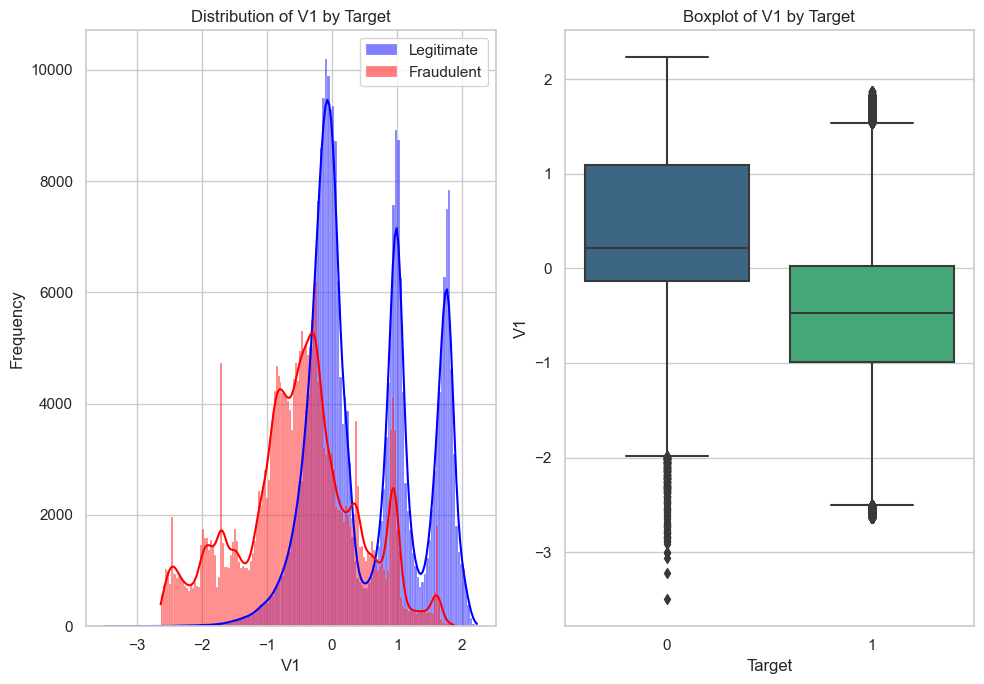

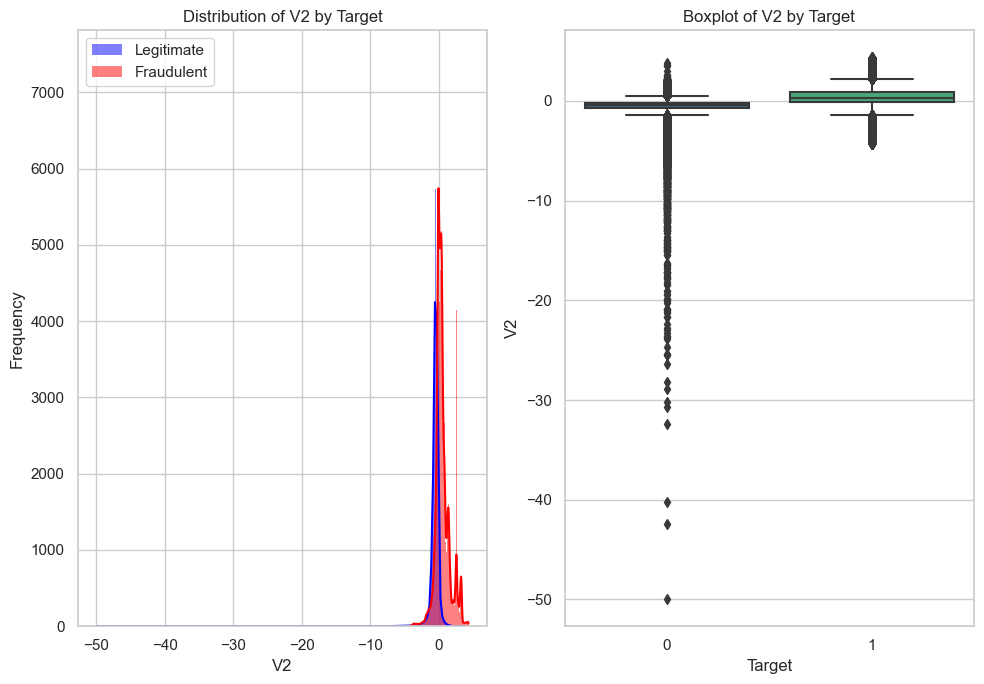

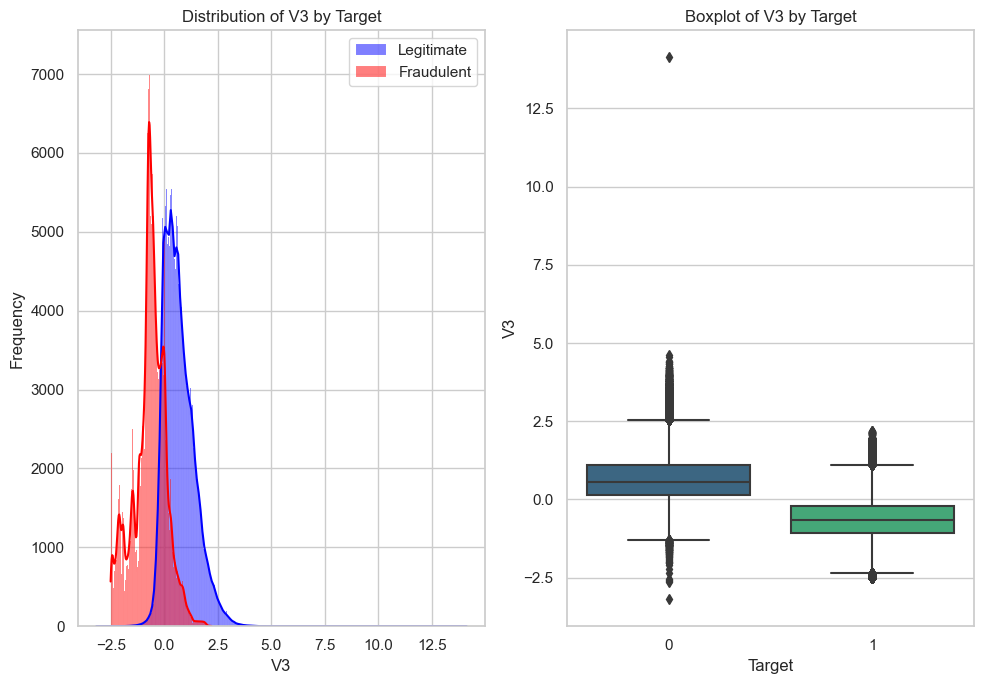

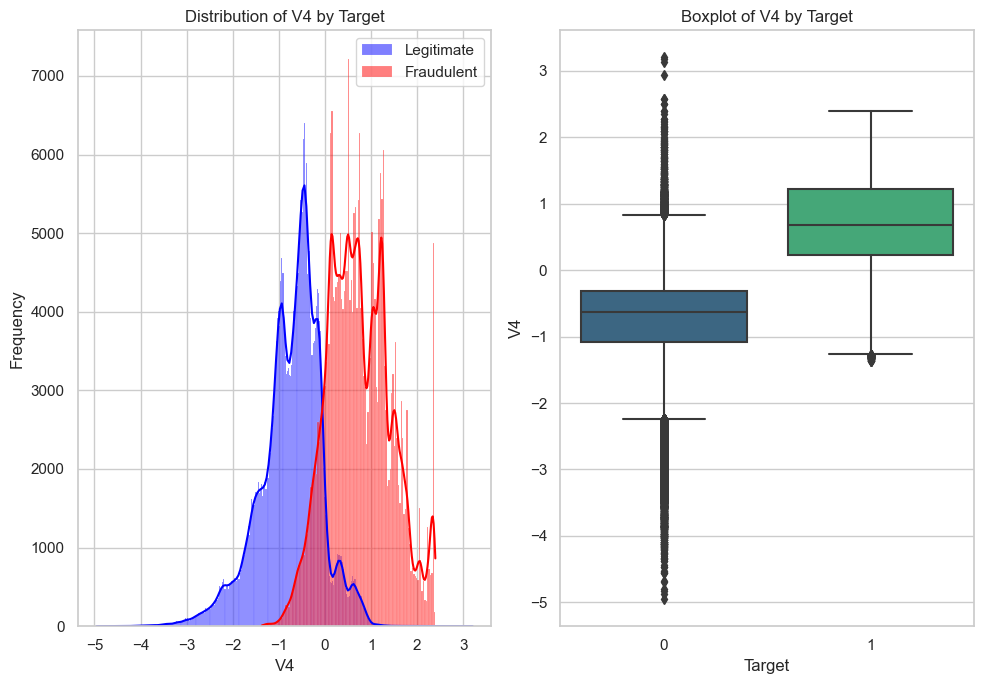

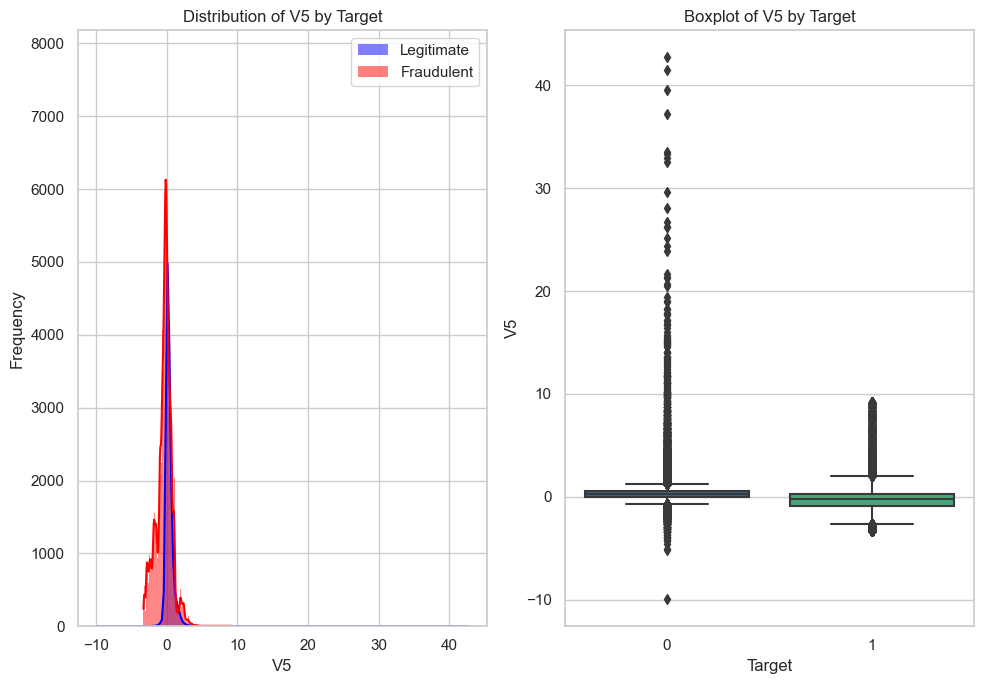

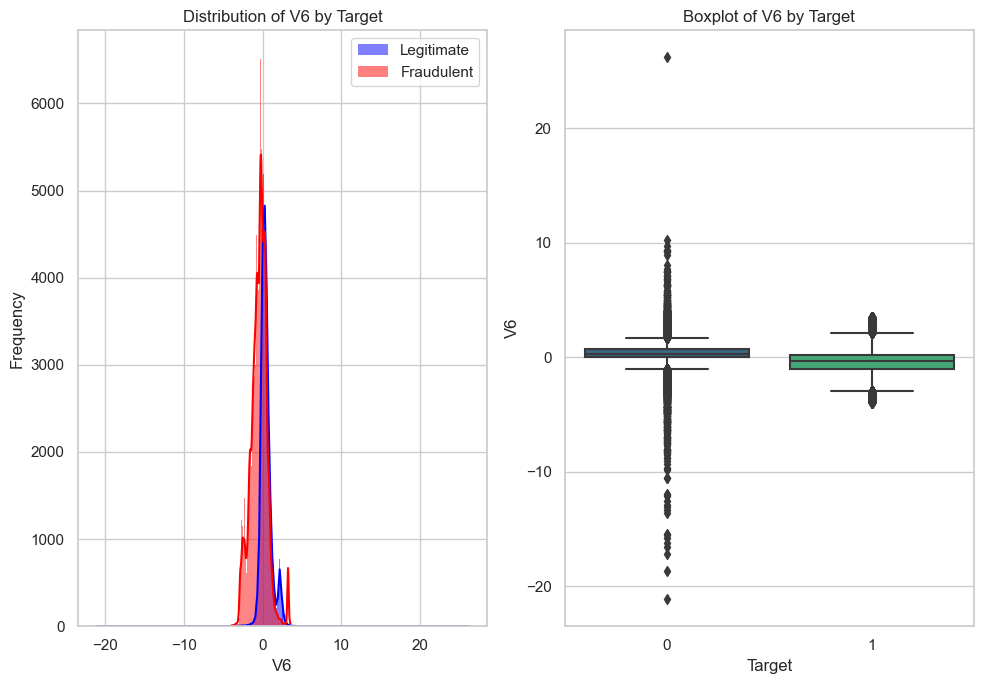

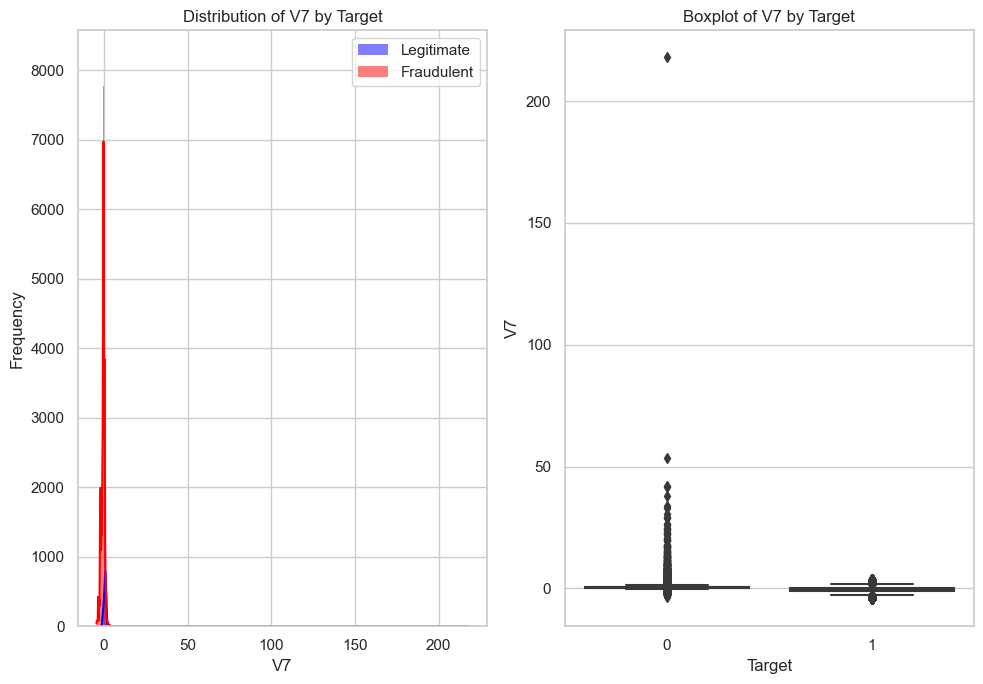

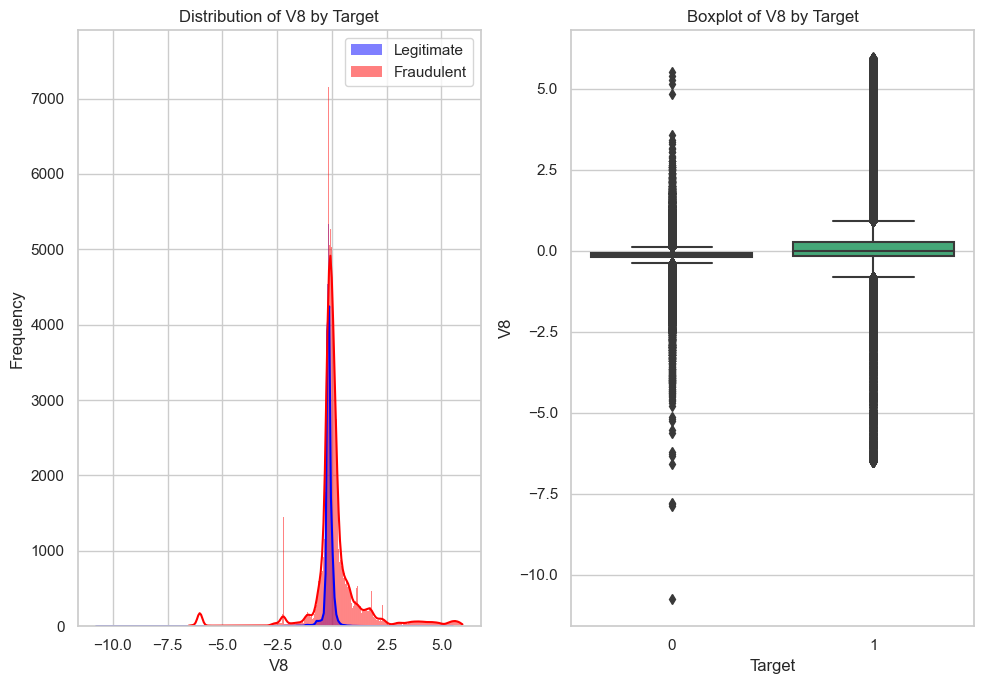

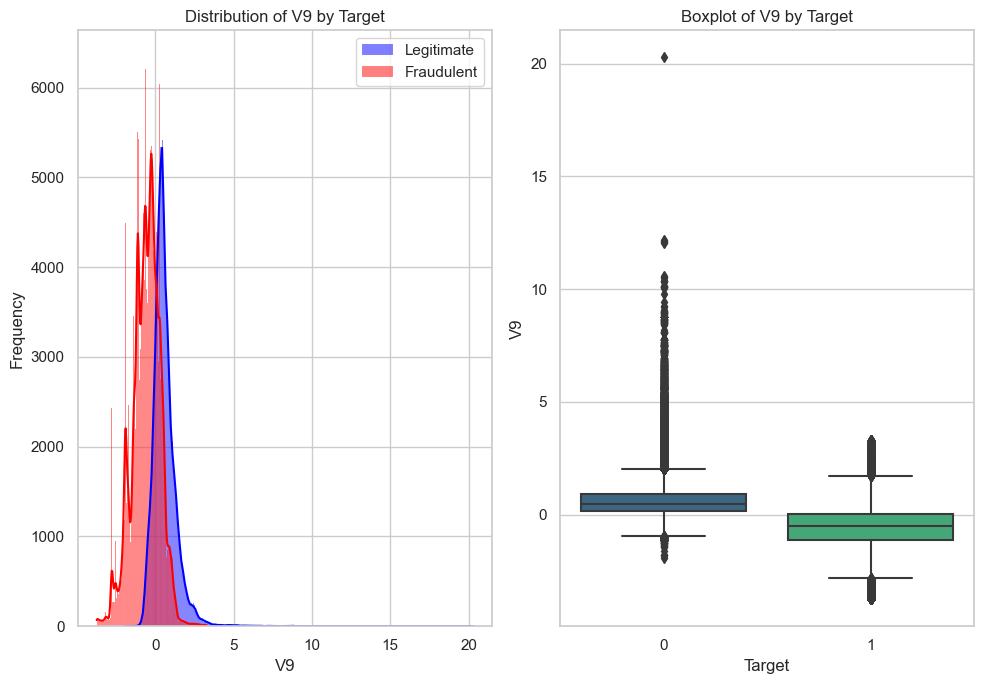

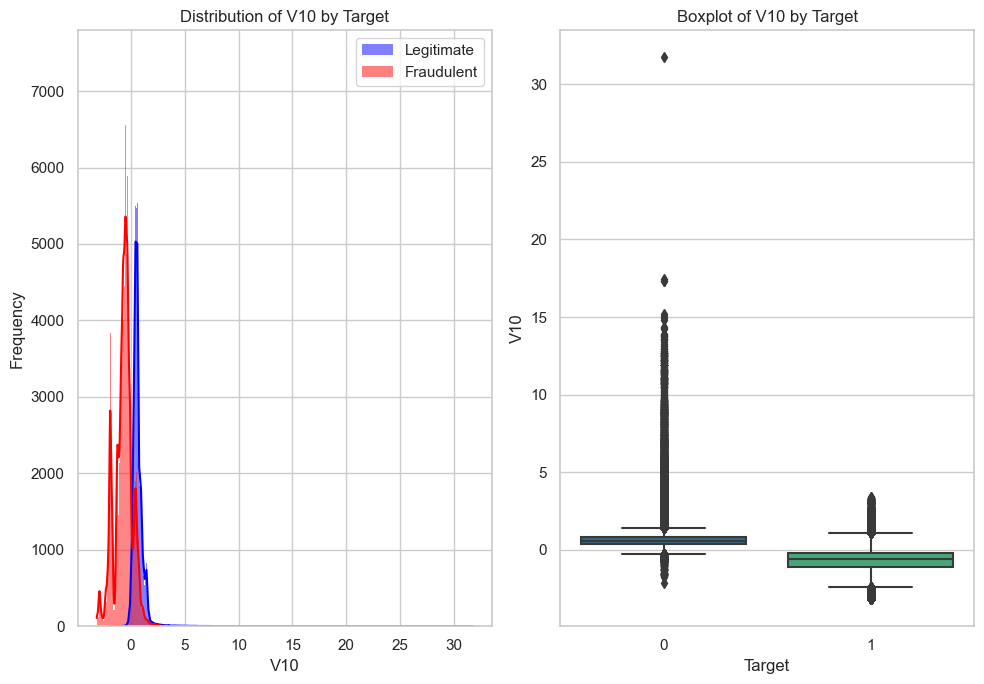

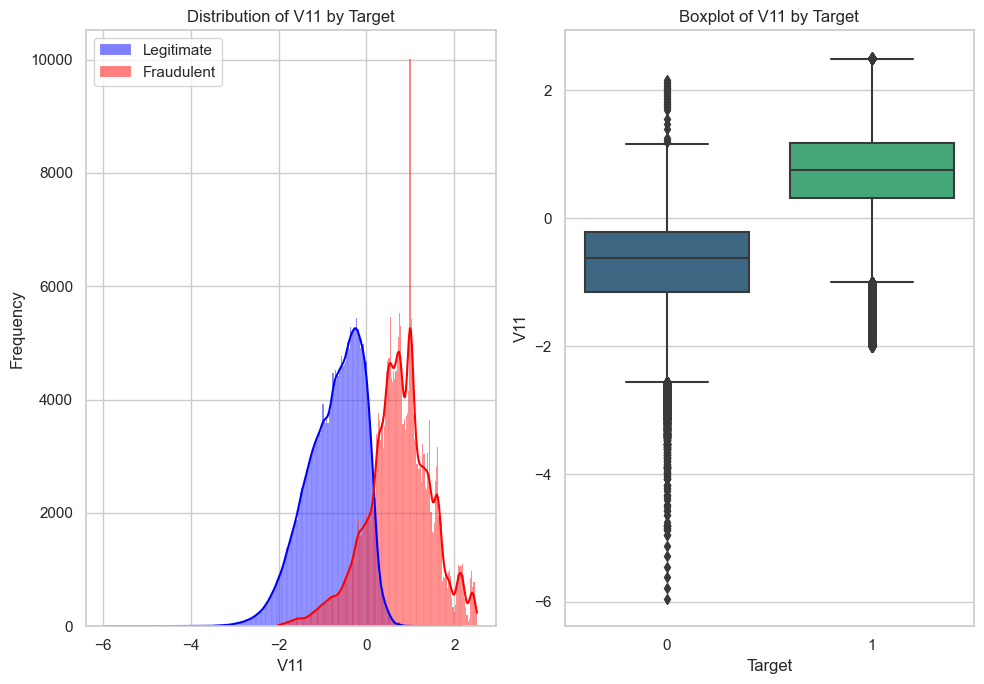

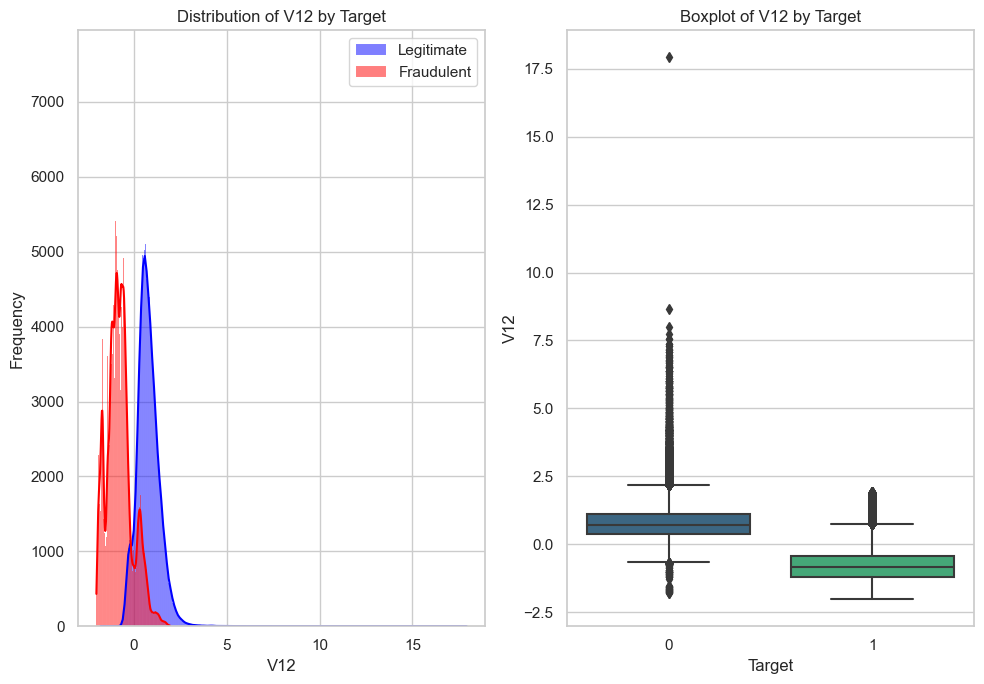

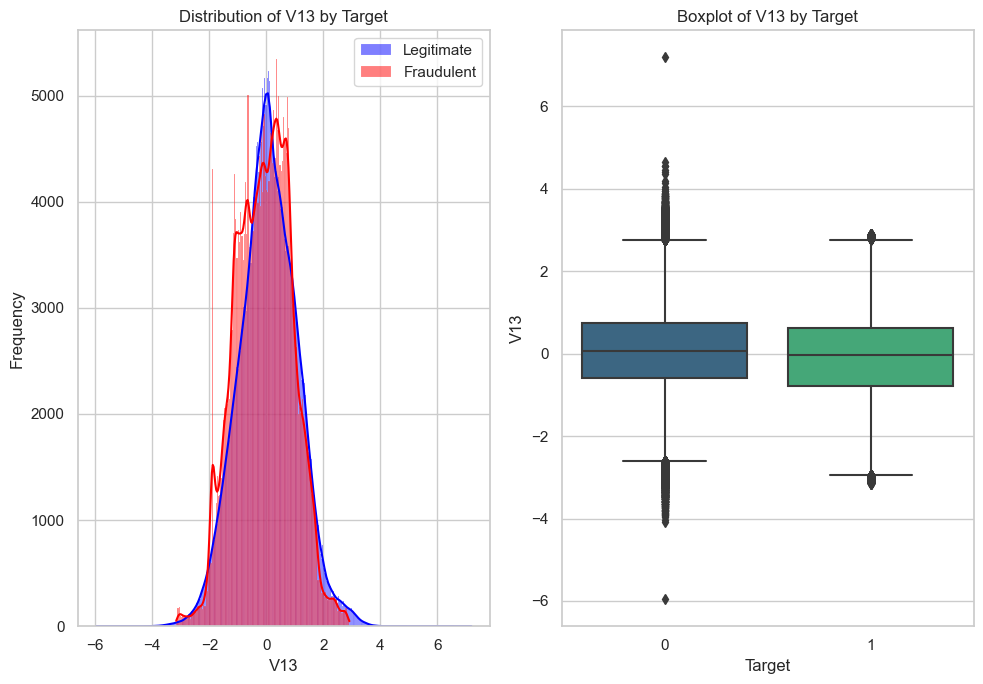

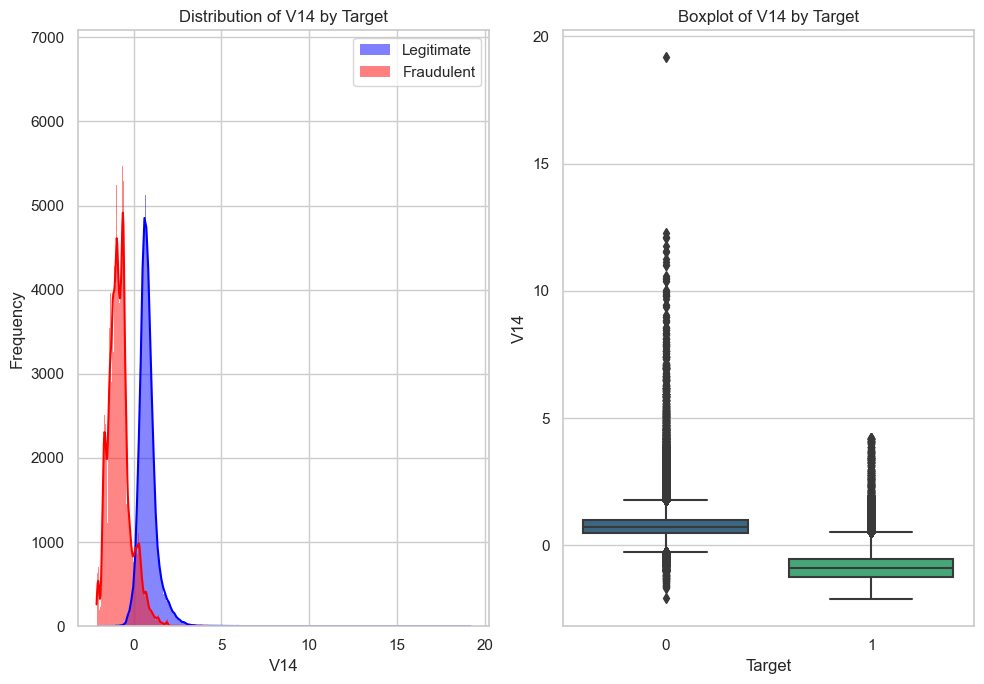

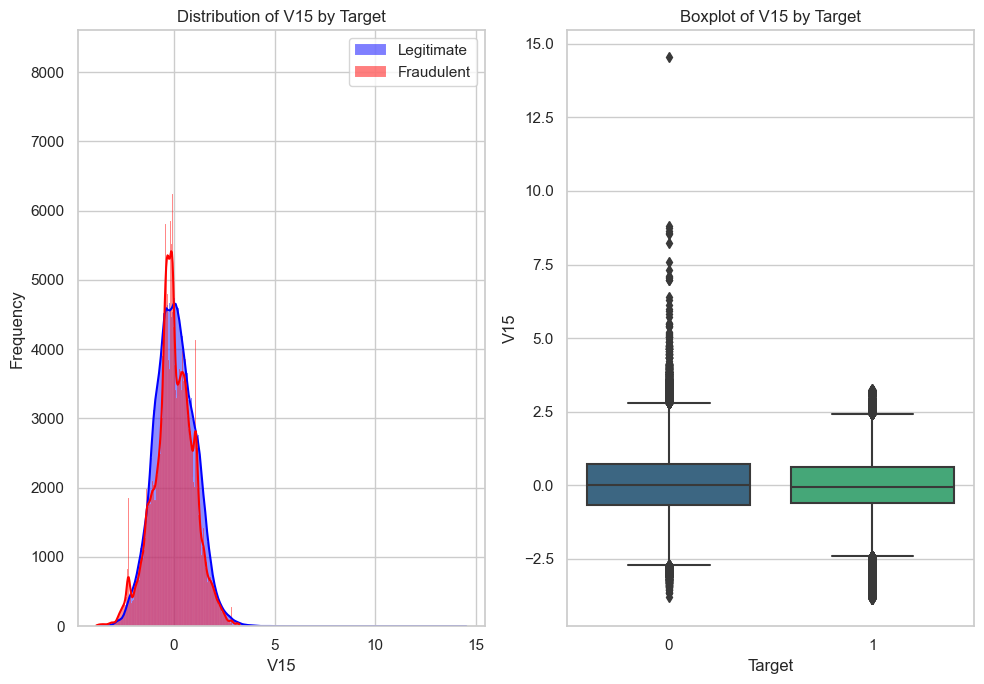

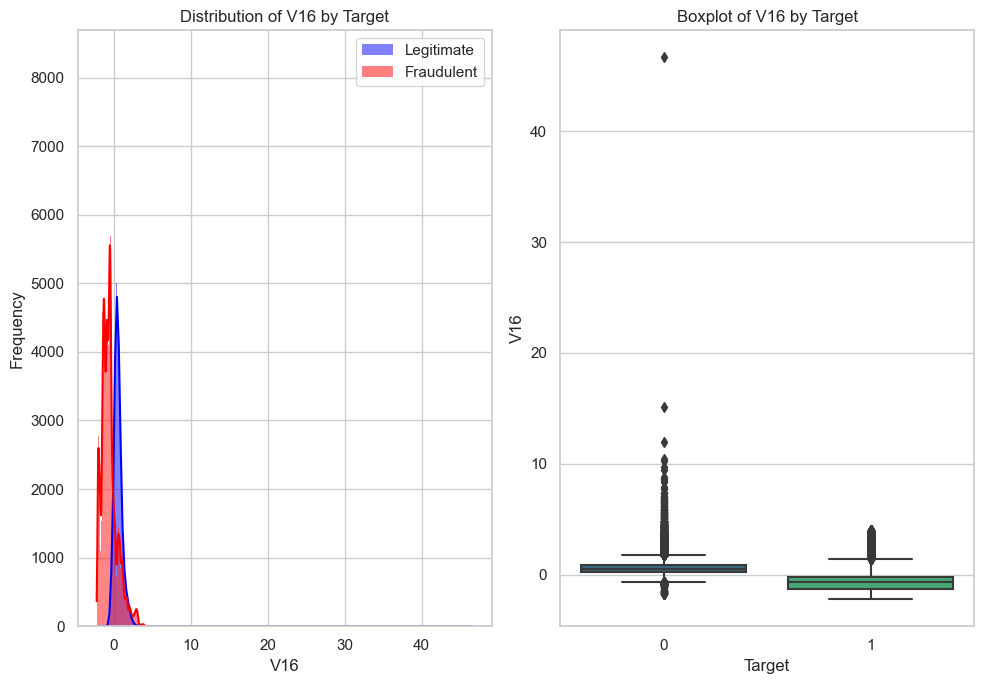

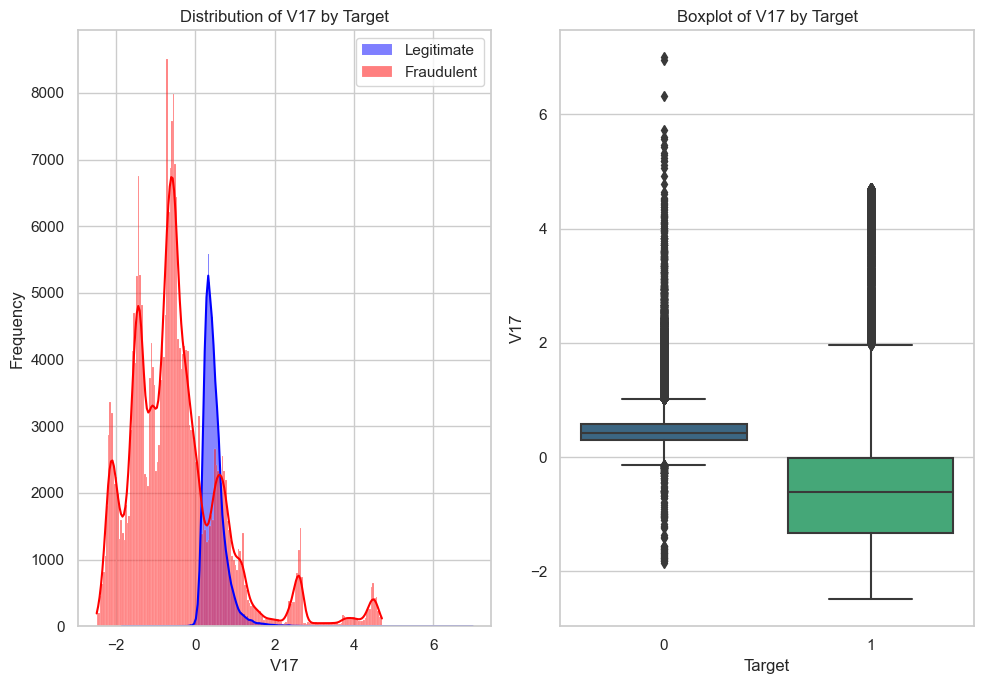

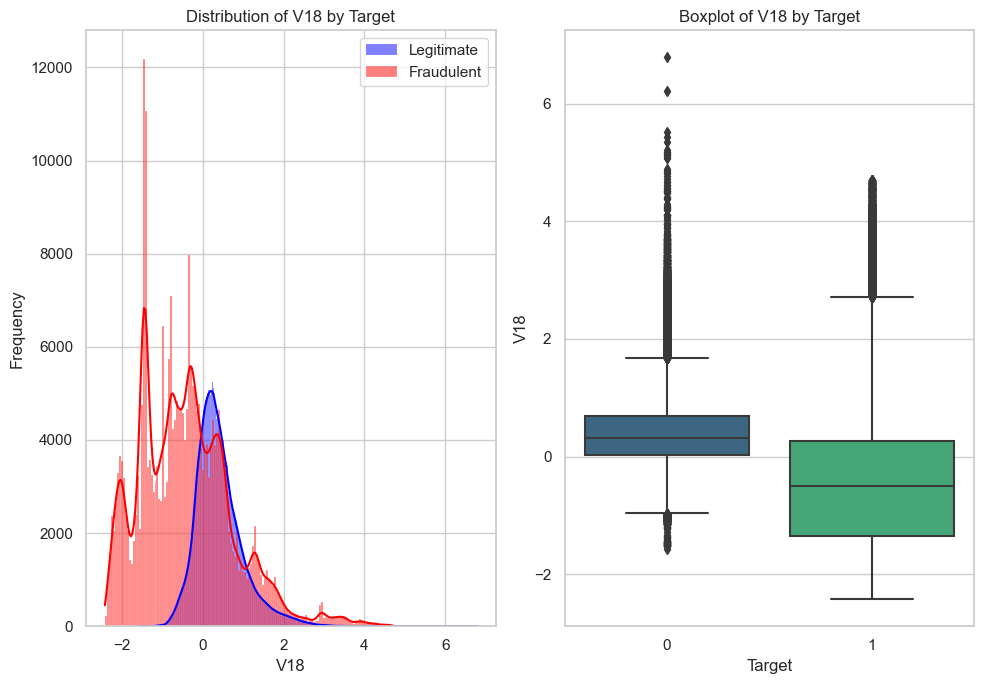

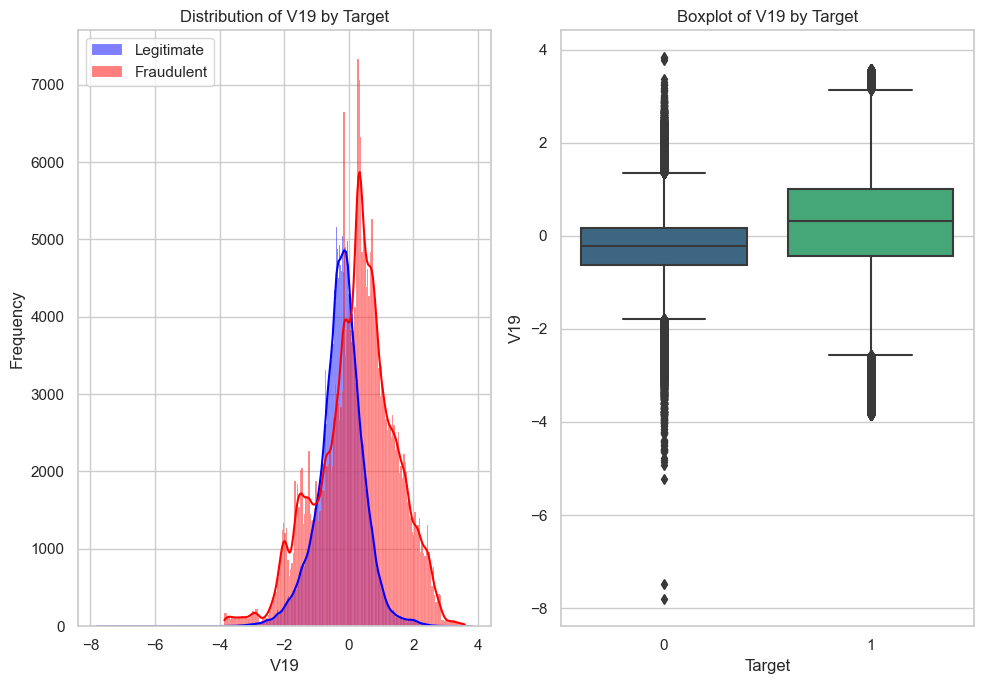

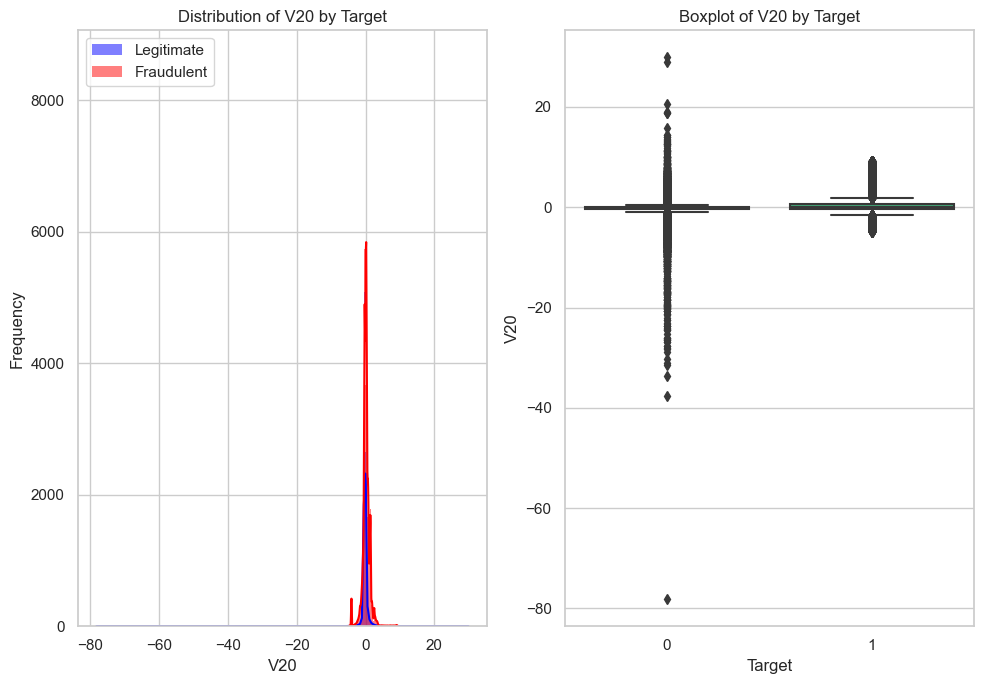

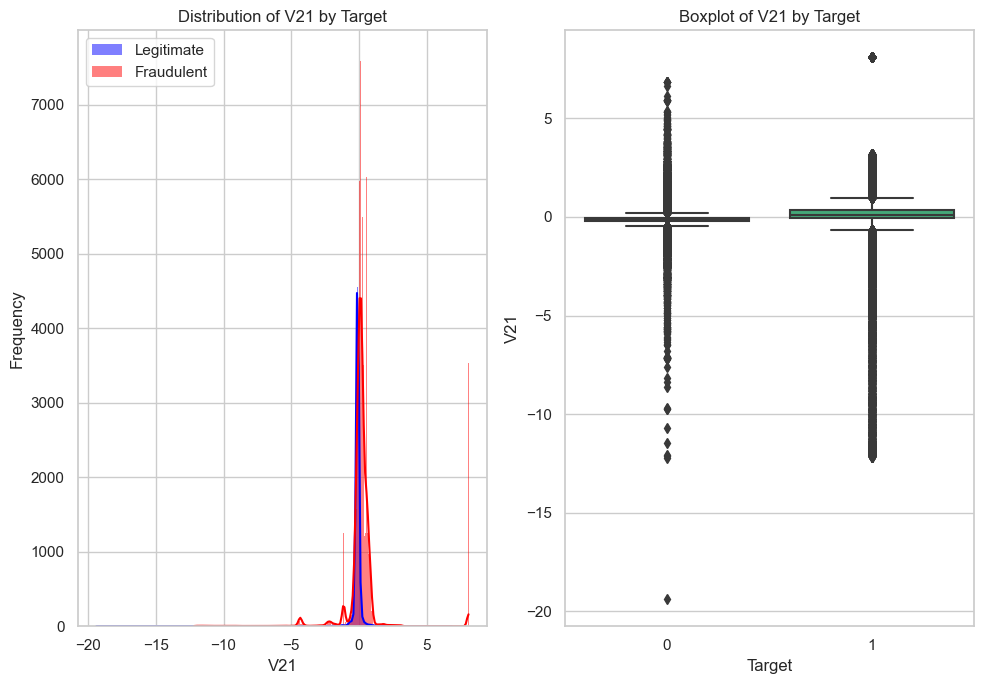

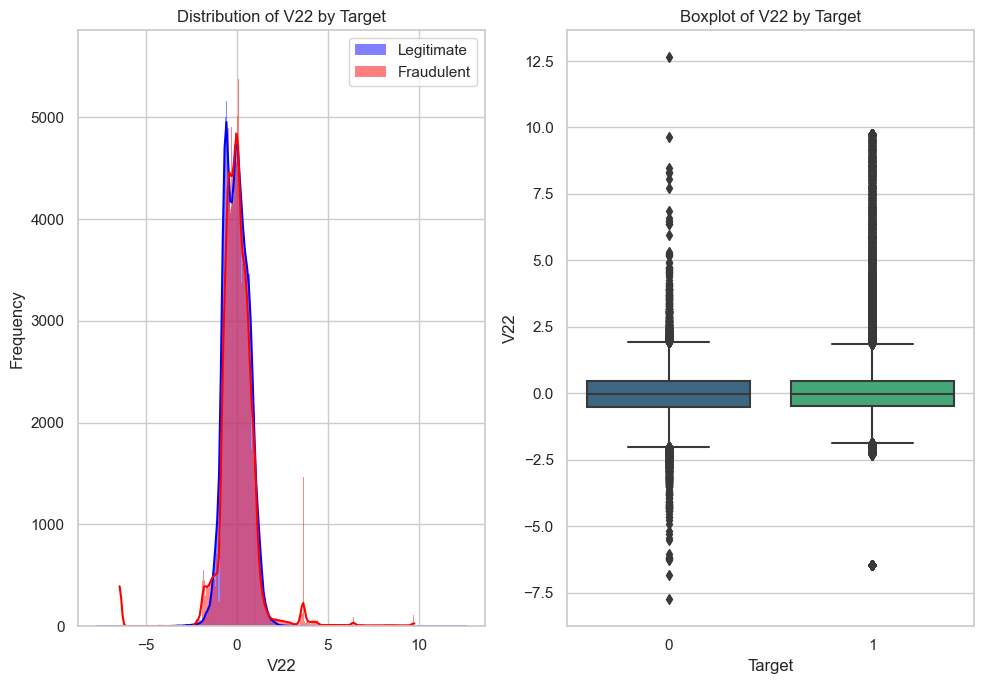

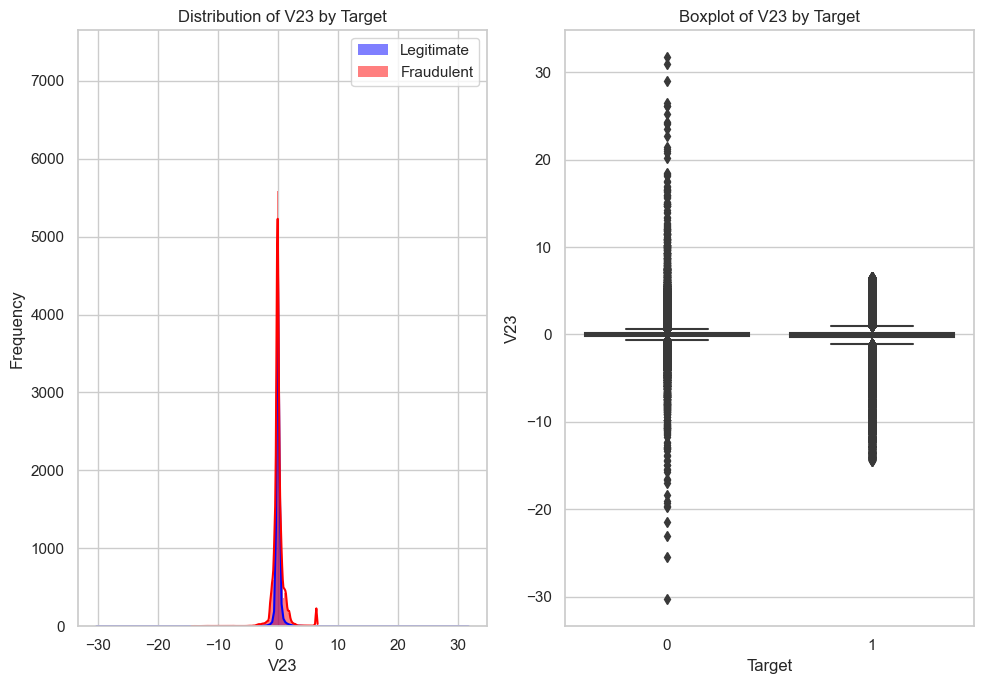

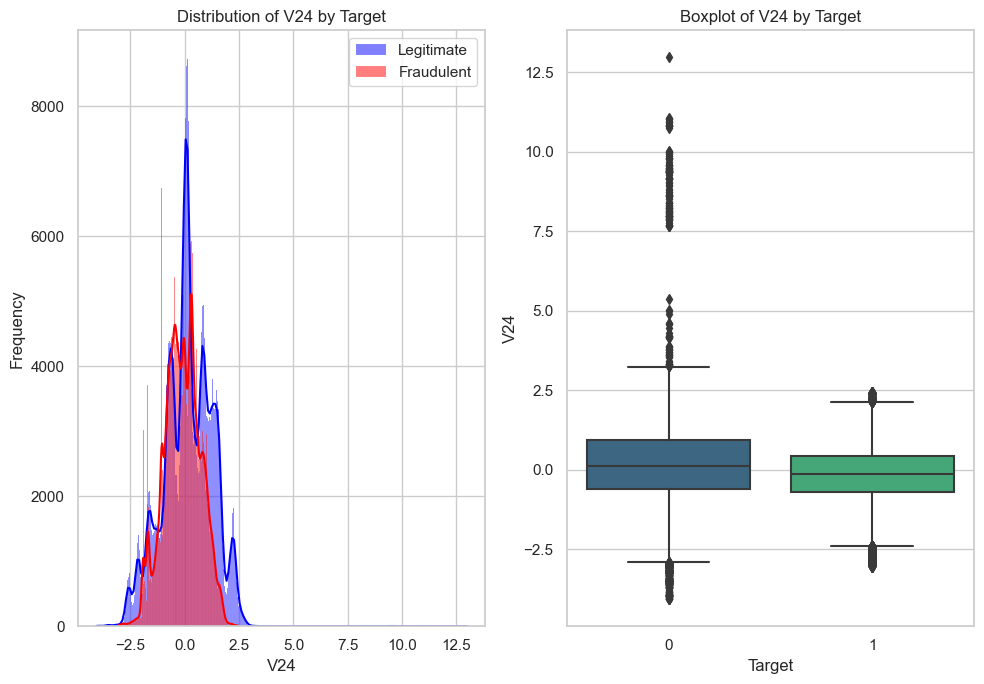

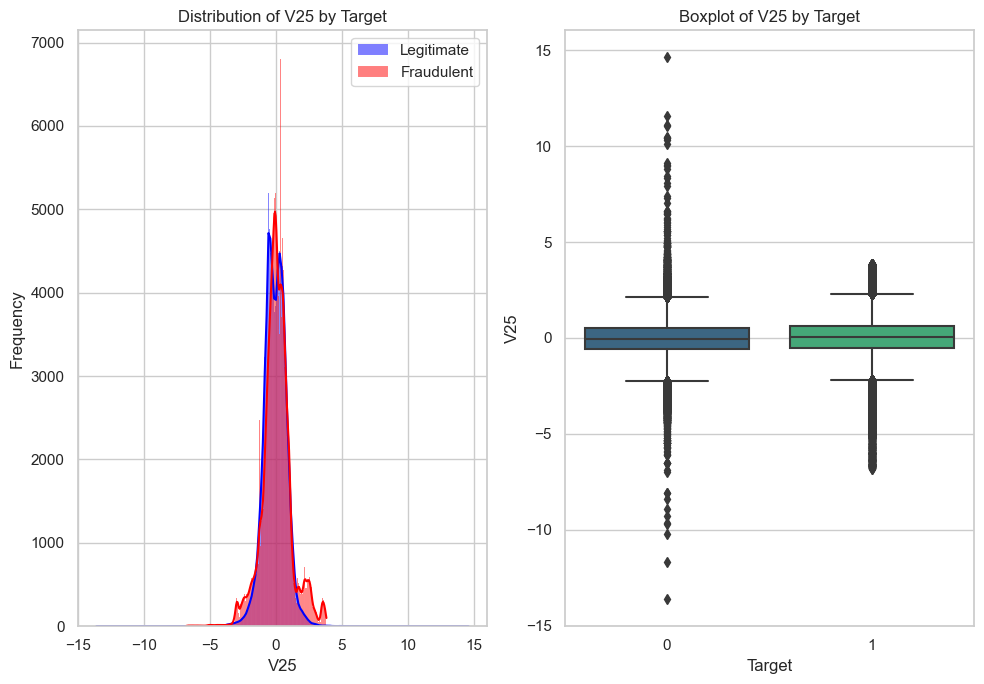

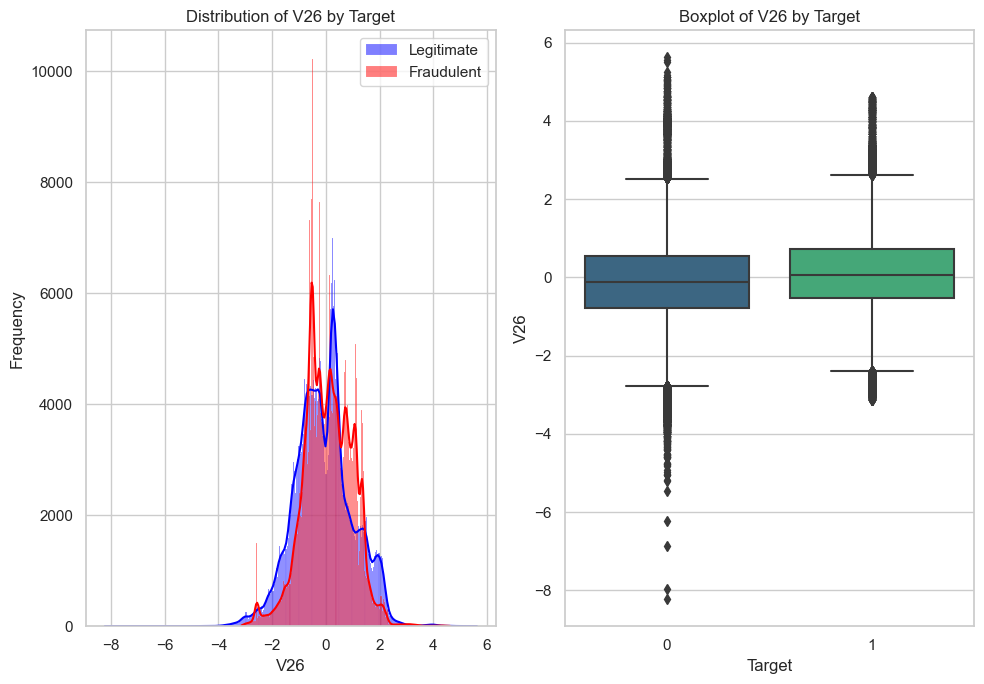

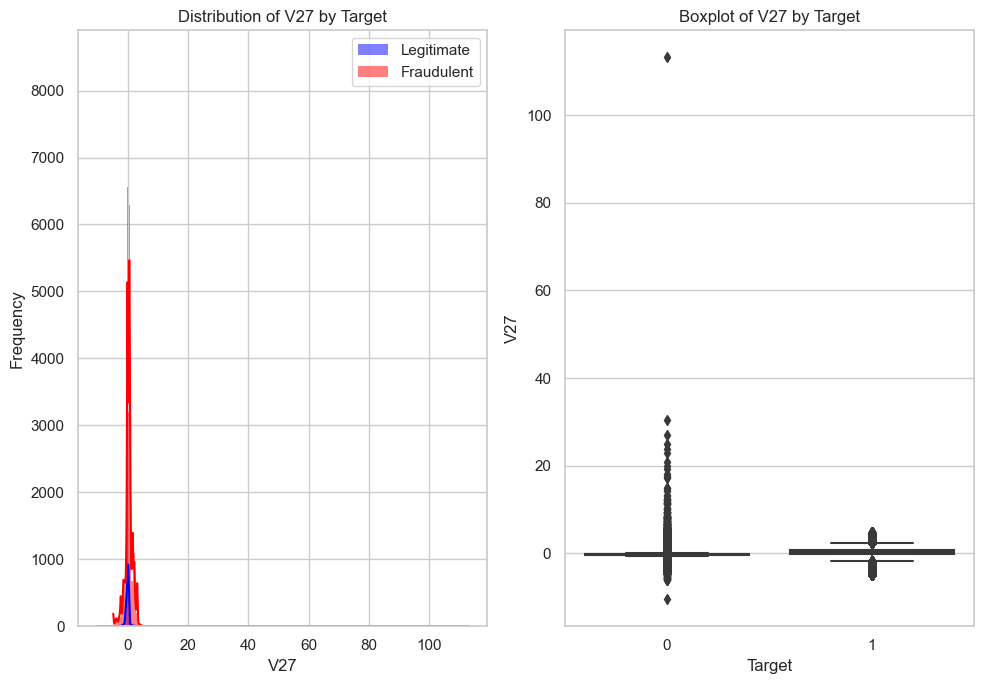

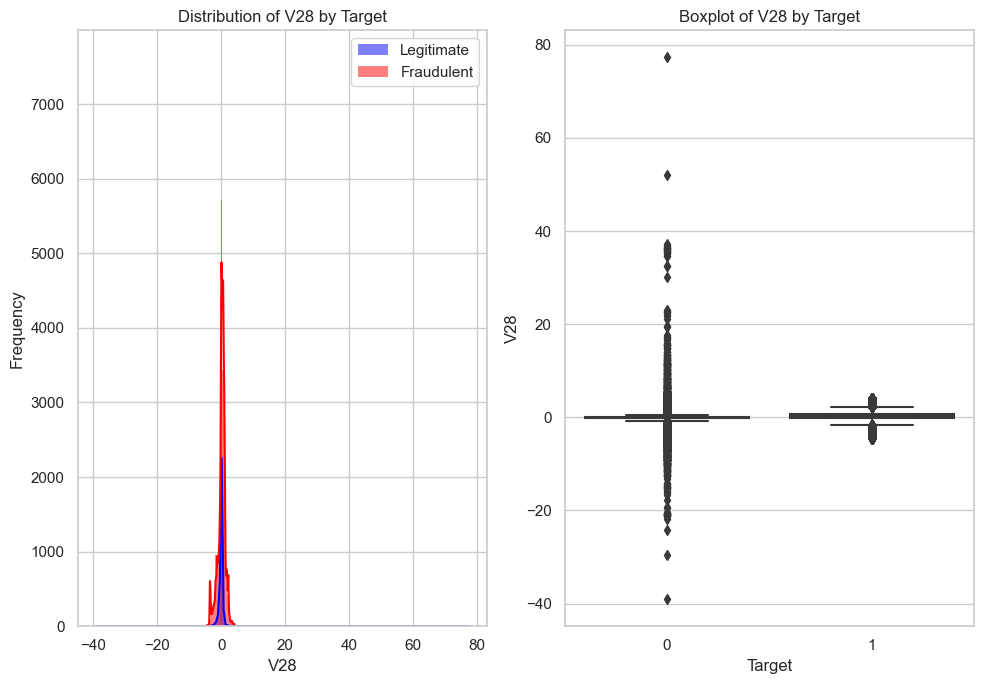

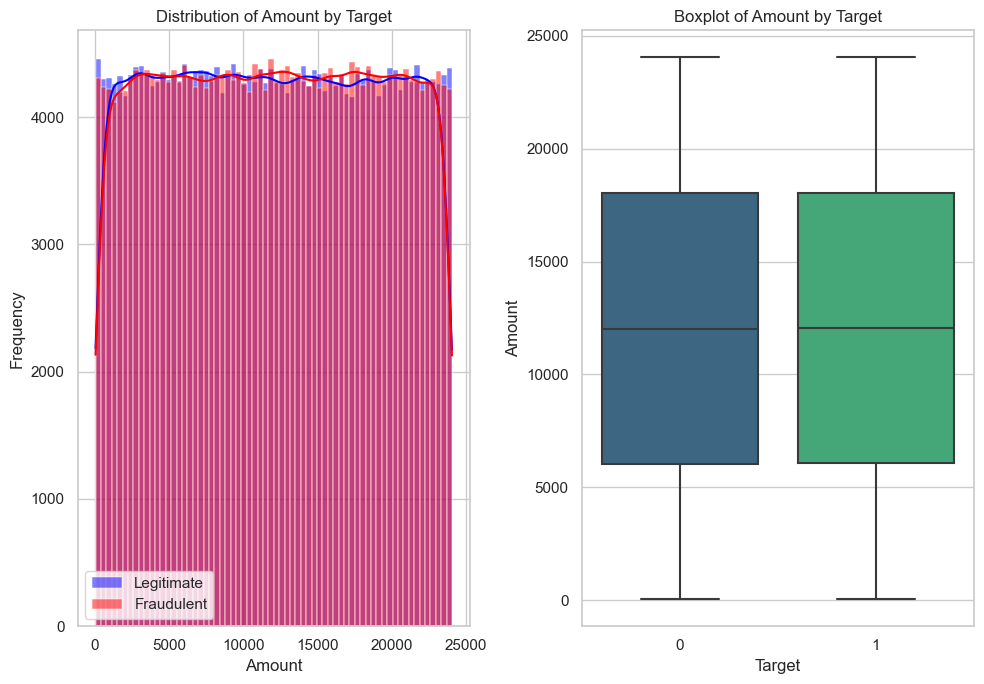

In [11]:
# Plot distribution of all the columns
sns.set(style="whitegrid")

# Loop through each column in the DataFrame
for column in df.columns:
    if column != 'Class':  # Exclude the target column
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize= (10,7))
        # Plot the distribution for legitimate transactions
        sns.histplot(legit_data[column], kde=True, color='blue', label='Legitimate', ax=axes[0])
        
        # Plot the distribution for fraudulent transactions
        sns.histplot(fraud_data[column], kde=True, color='red', label='Fraudulent', ax = axes[0])

        # Plot the boxplot for legitimate transactions
        sns.boxplot(x='Class', y=column, data=df, palette='viridis', ax=axes[1])

        
        axes[0].set_title(f'Distribution of {column} by Target')
        axes[0].set_xlabel(column)
        axes[0].set_ylabel('Frequency')
        axes[0].legend()

        axes[1].set_title(f"Boxplot of {column} by Target")
        axes[1].set_xlabel("Target")
        axes[1].set_ylabel(column)
        
        plt.tight_layout()
        plt.show()

## Data Exploration and Preprocessing
From the EDA we gain a few insights
1. There are no missing values in the data
2. The distributions of each feature column separated by class labels show some differences in distributions
3. The feature columns contain a significant number of outliers
    - This will have to be addressed using Robust Scaling
4. The amount of money involved in a transaction has no bearing on whether a transaction is fraudulent or not as the distributions are no different between class labels

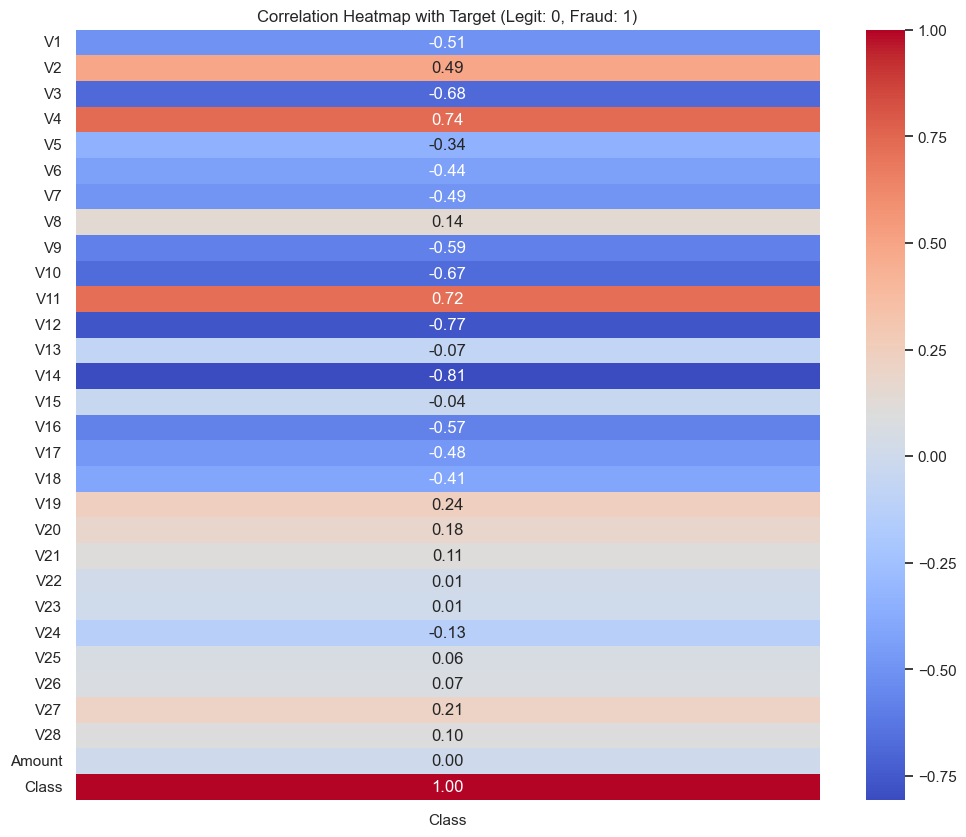

In [12]:
# Plotting Correlation Matrix
# Combine legitimate and fraudulent data for correlation analysis
combined_data = pd.concat([df.drop('Class', axis=1), df['Class']], axis=1)

# Calculate the correlation matrix
correlation_matrix = combined_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix[['Class']], annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap with Target (Legit: 0, Fraud: 1)')
plt.show()

The correlation heatmap of each feature to the target class show that a few of the features are correlated to the target class. This includes V3, V4, V11, V12, and V14. This can be useful with possible dimensionality reduction to utilize only these features to achieve comparable results to using all the features.

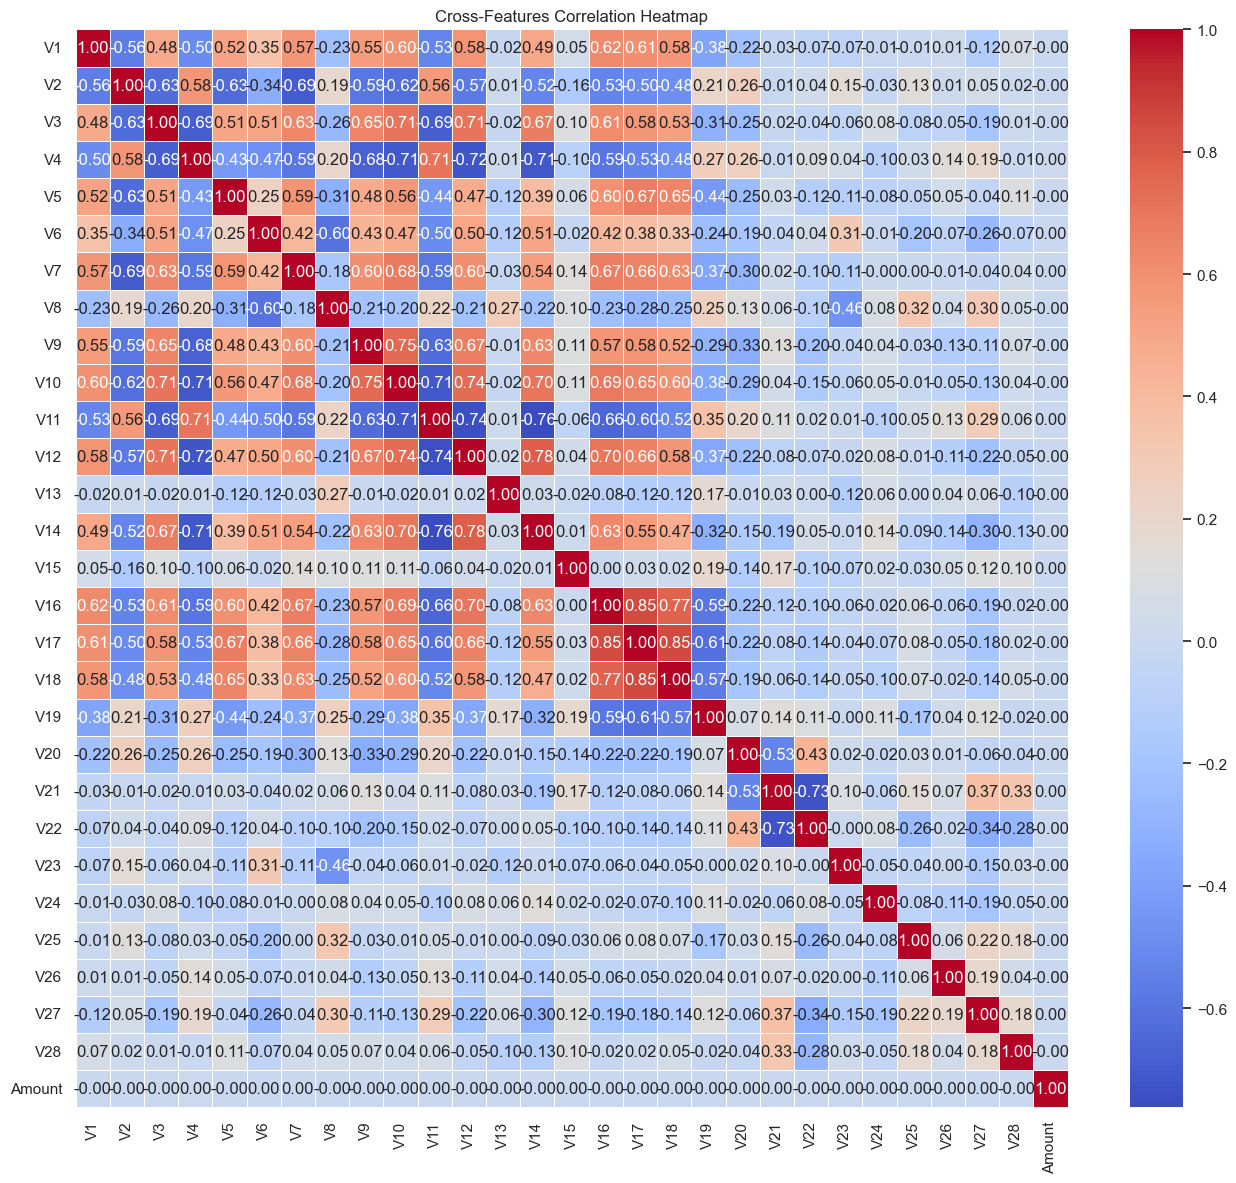

In [13]:
# Plotting Cross-Feature Correlation
feature_correlation_matrix = df.drop('Class', axis=1).corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 14))

# Create a heatmap using seaborn
sns.heatmap(feature_correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)

plt.title('Cross-Features Correlation Heatmap')
plt.show()

When looking at the cross-features correlation heatmap, the main insight is that features V16, V17, and V18 seem to be correlated among one another as we seen large positive correlations among these three features. This is a potential avenue for dimensionality reduction as this may allow us to remove some columns as the correlation with other columns makes them redundant.

In [14]:
# Find class counts to check if data is balanced
df["Class"].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

The data is balanced

## Feature Engineering

In [15]:
X = df.drop("Class", axis = 1)
y = df[["Class"]]

cols = X.columns

scaler = RobustScaler() # Using RobustScaler to standardize the data while taking into account the large number of outliers
X[cols] = scaler.fit_transform(X[cols])

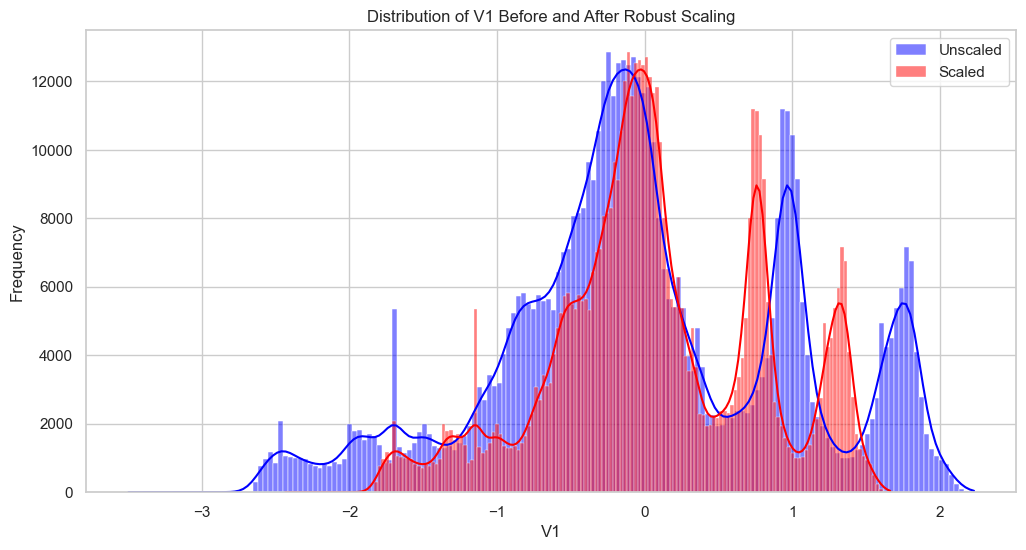

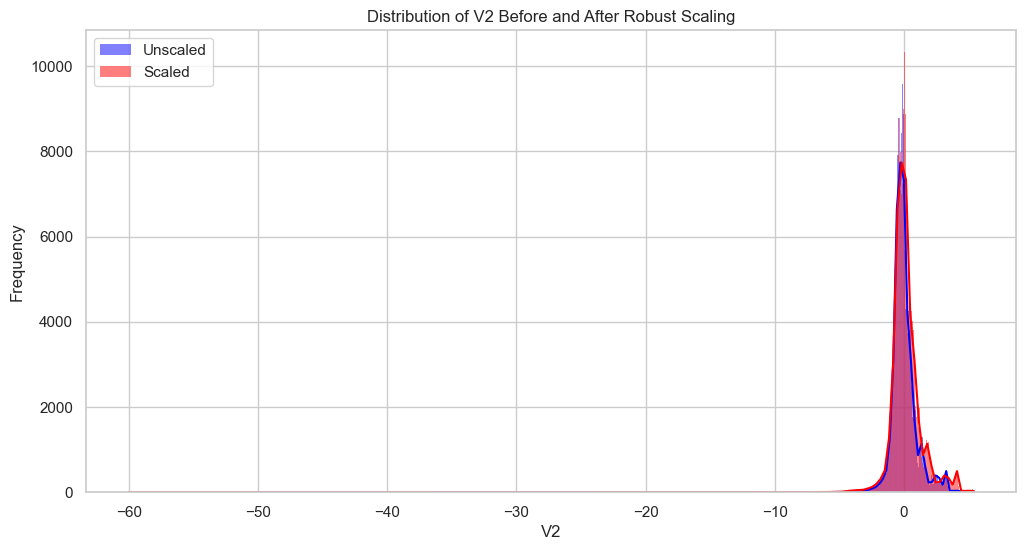

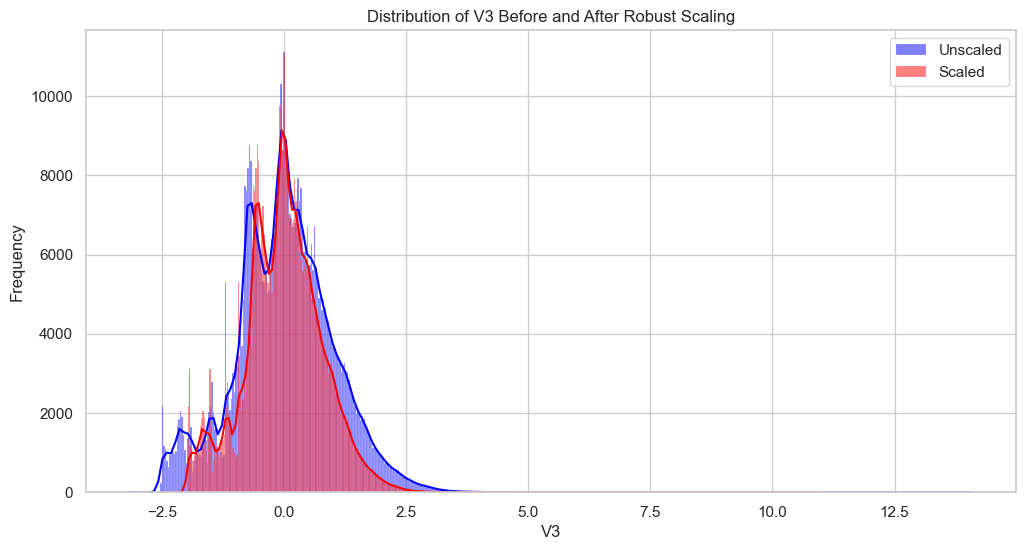

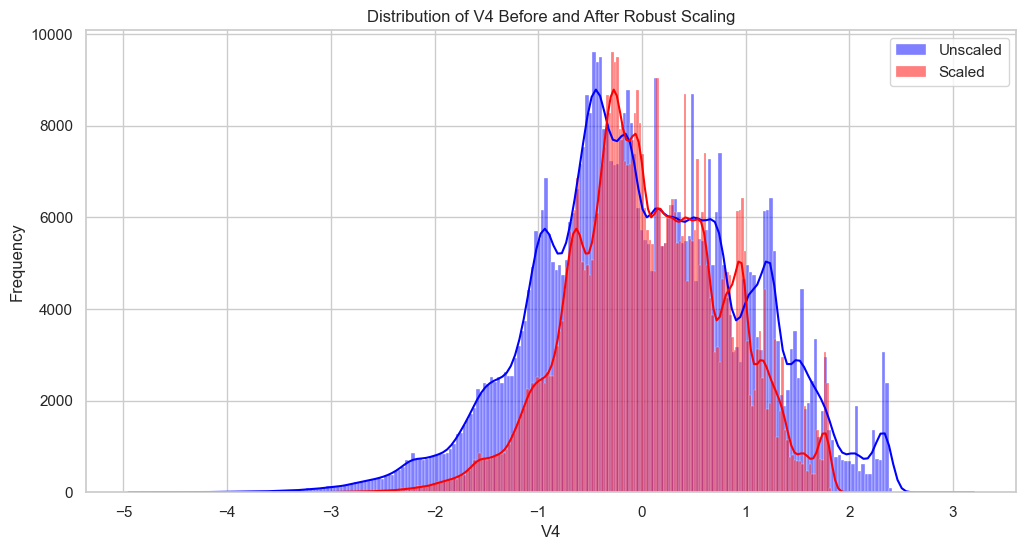

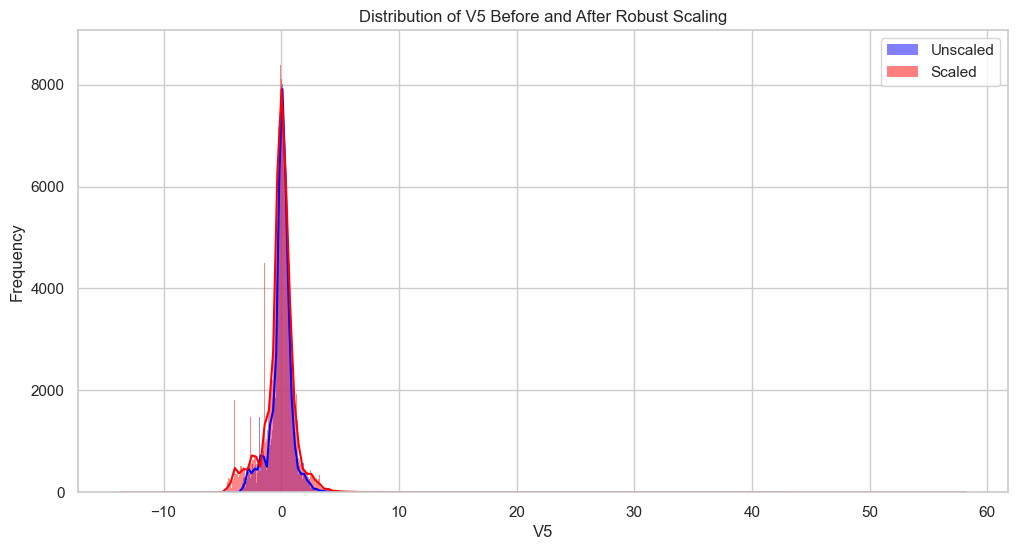

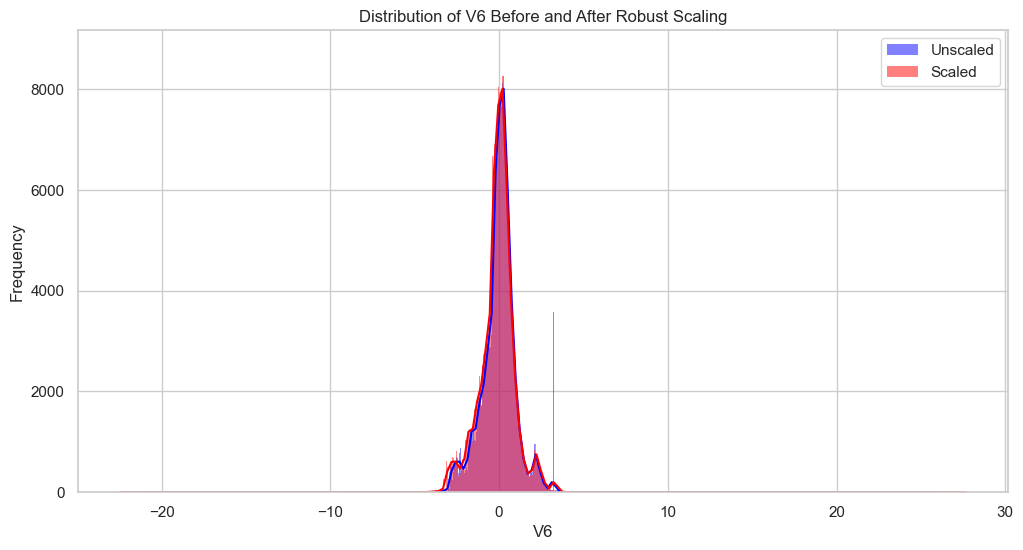

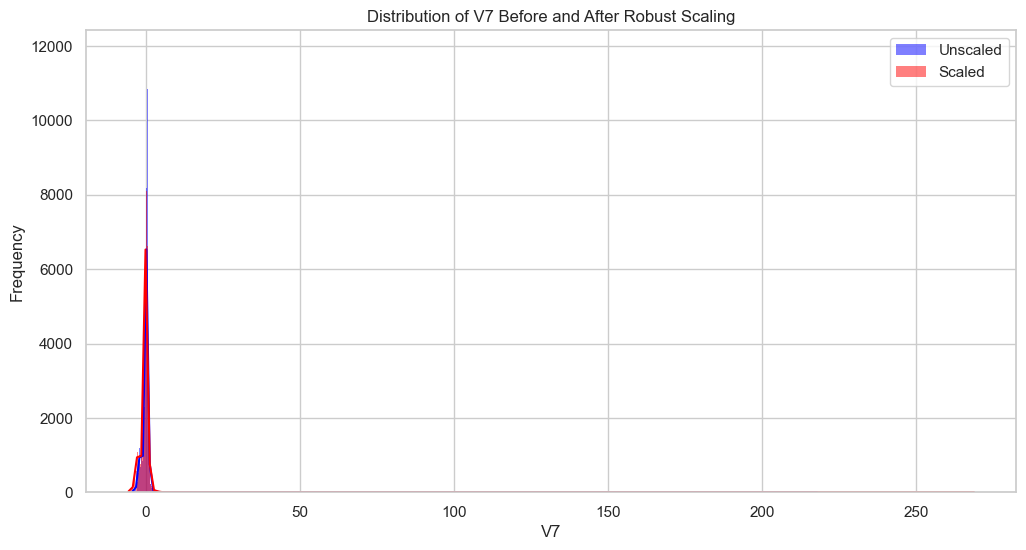

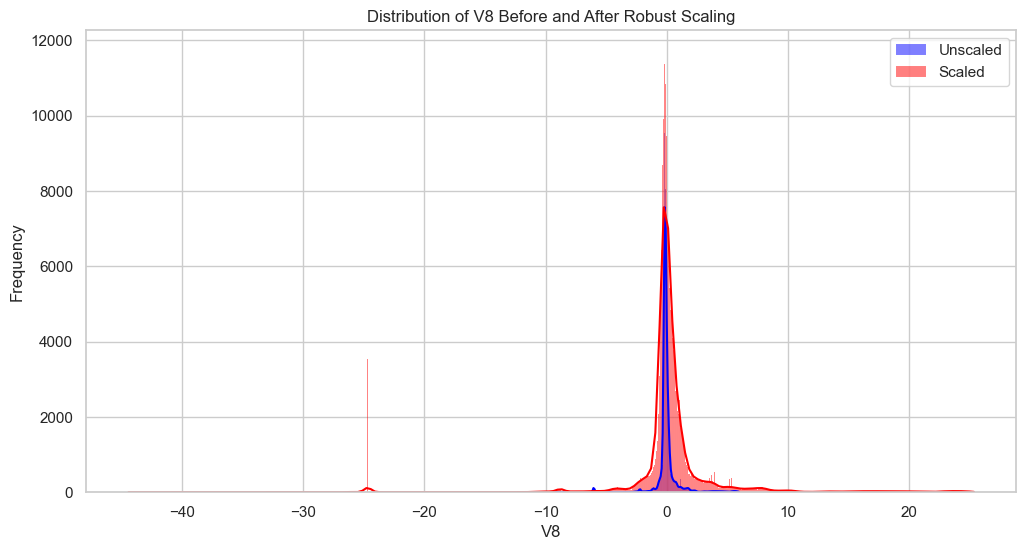

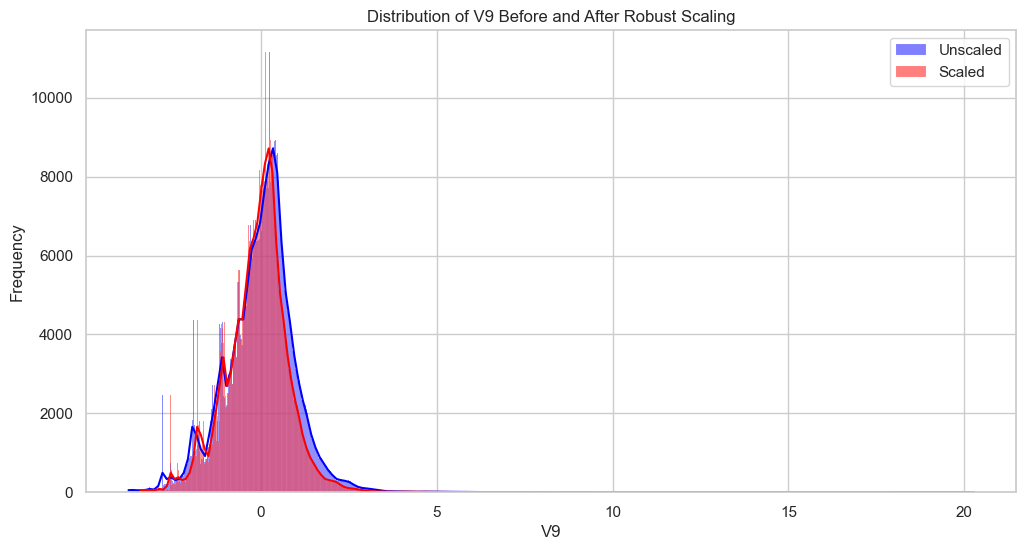

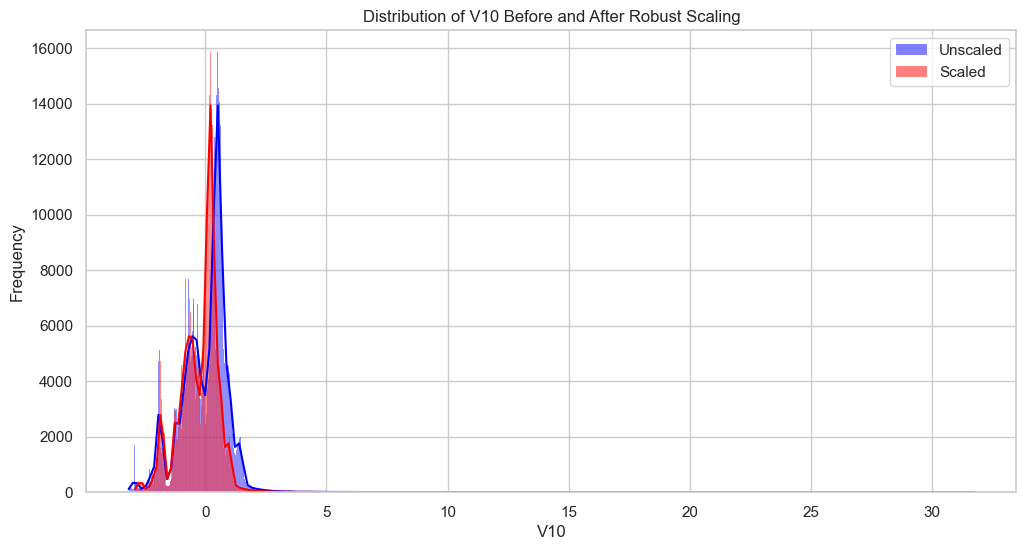

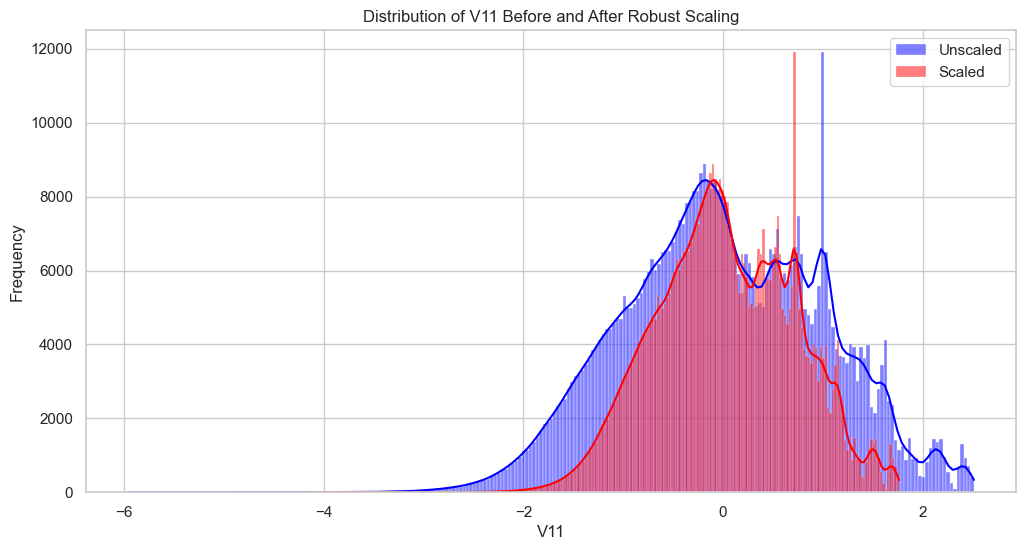

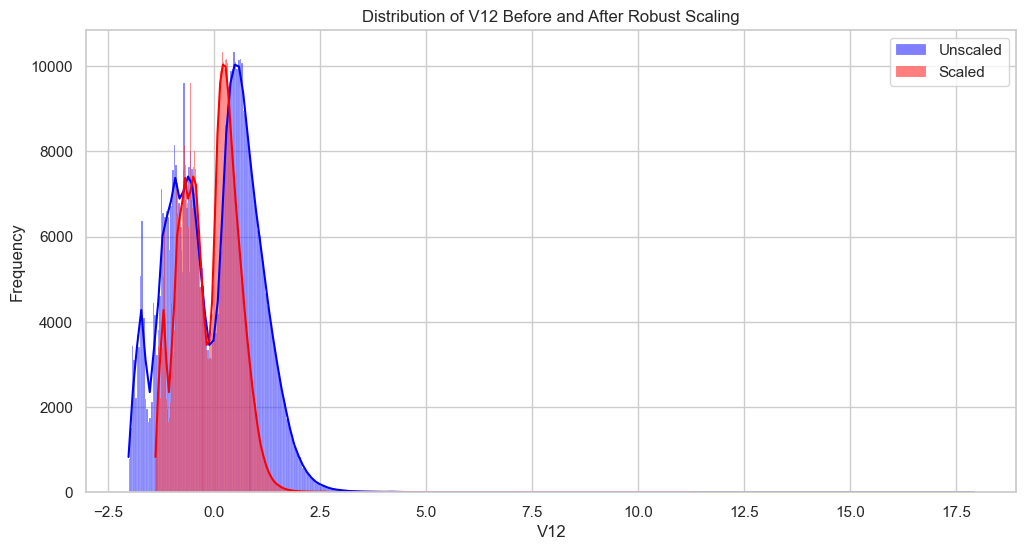

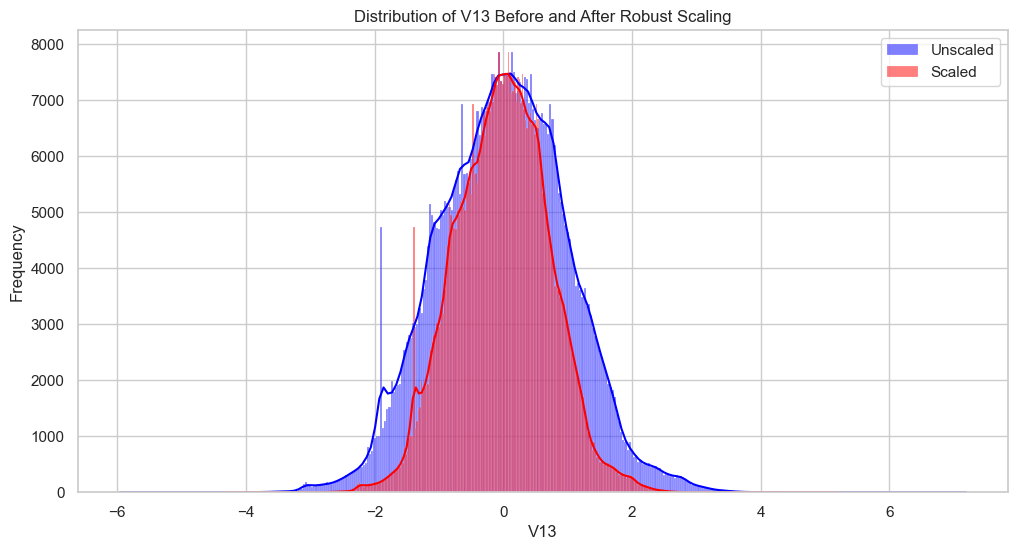

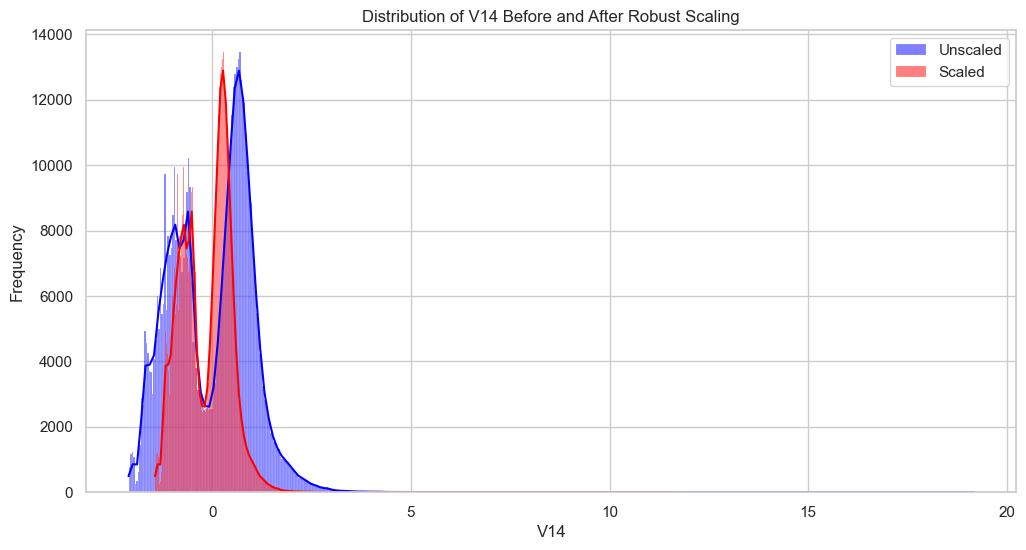

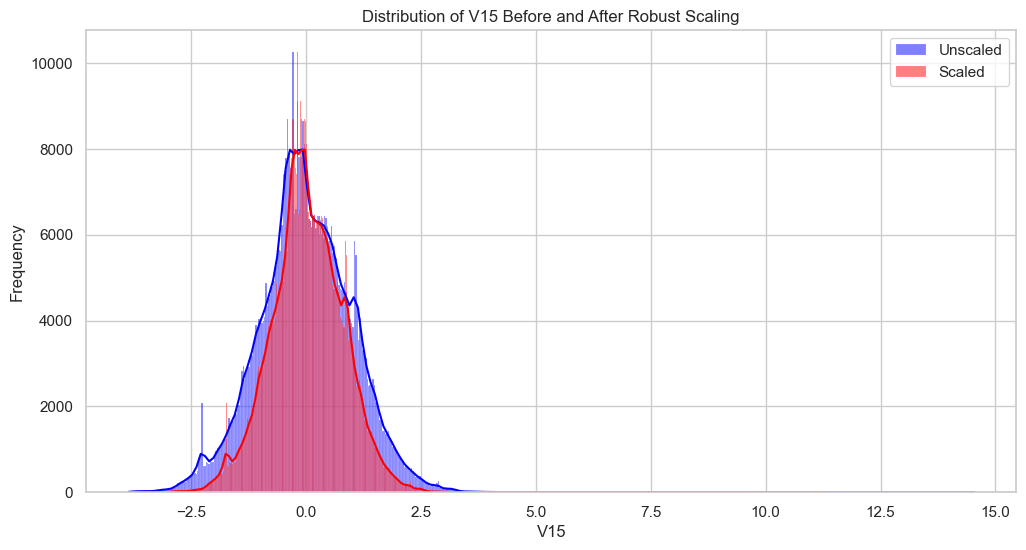

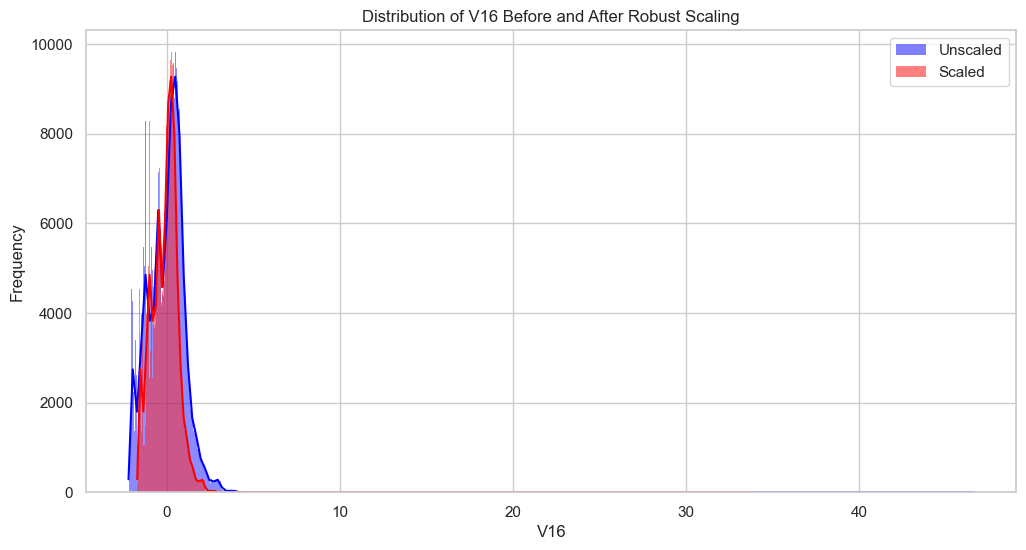

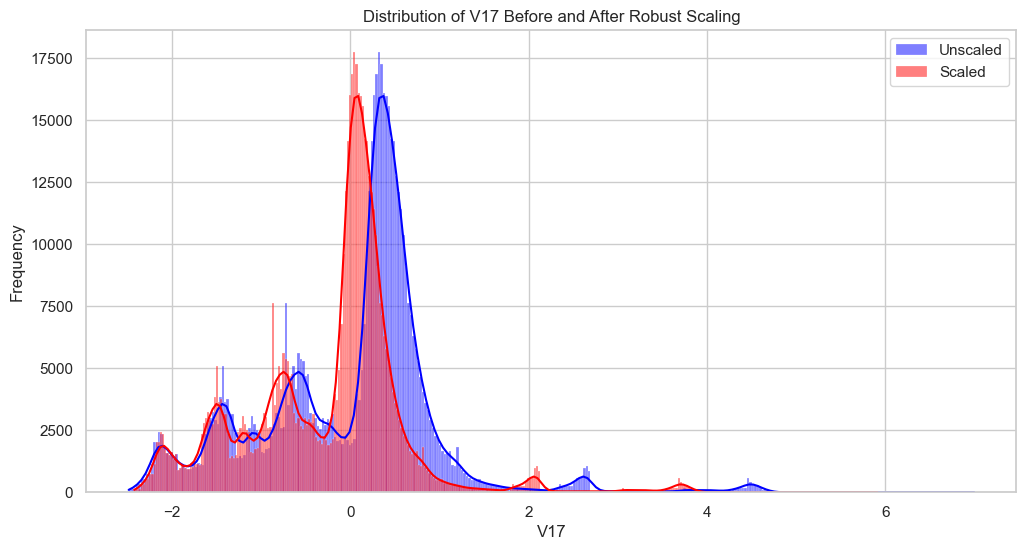

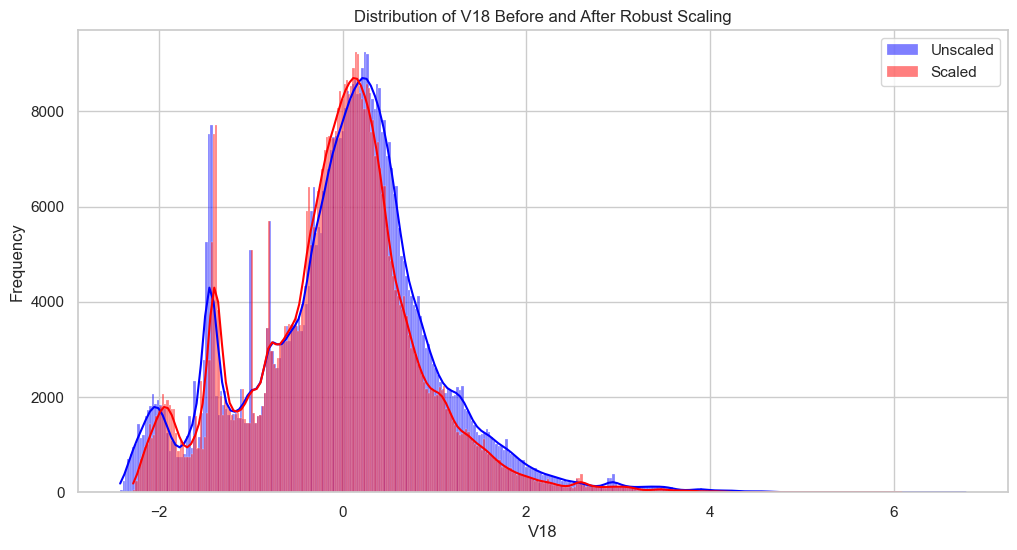

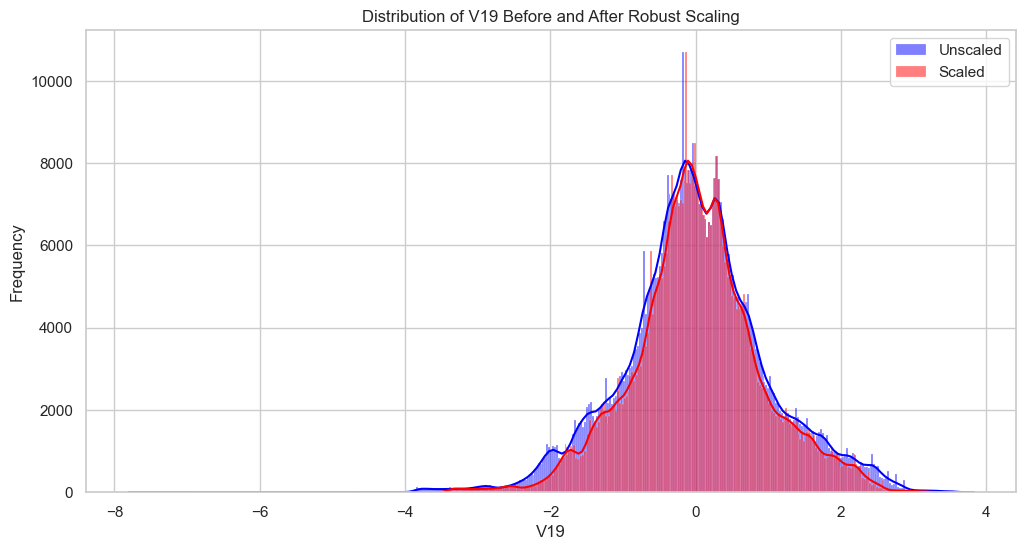

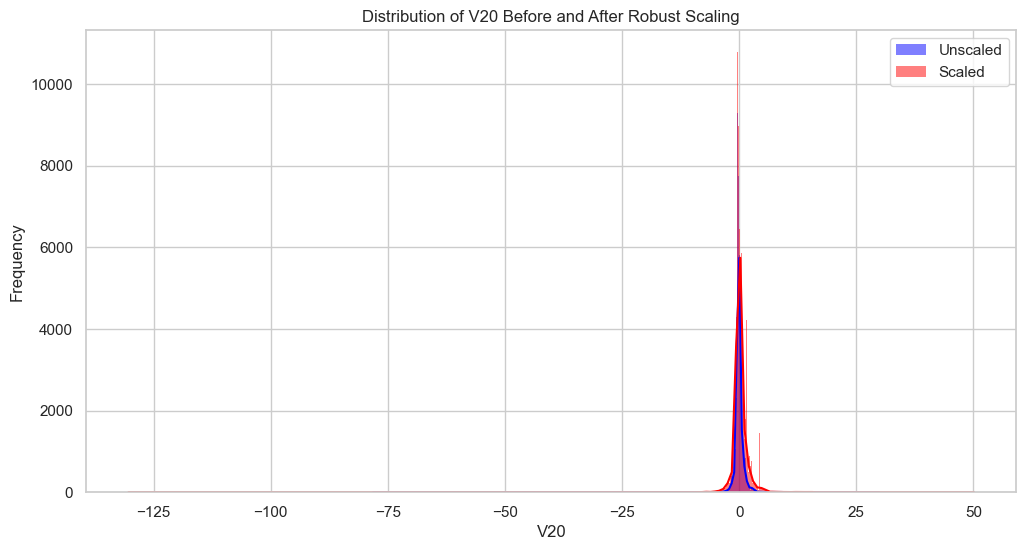

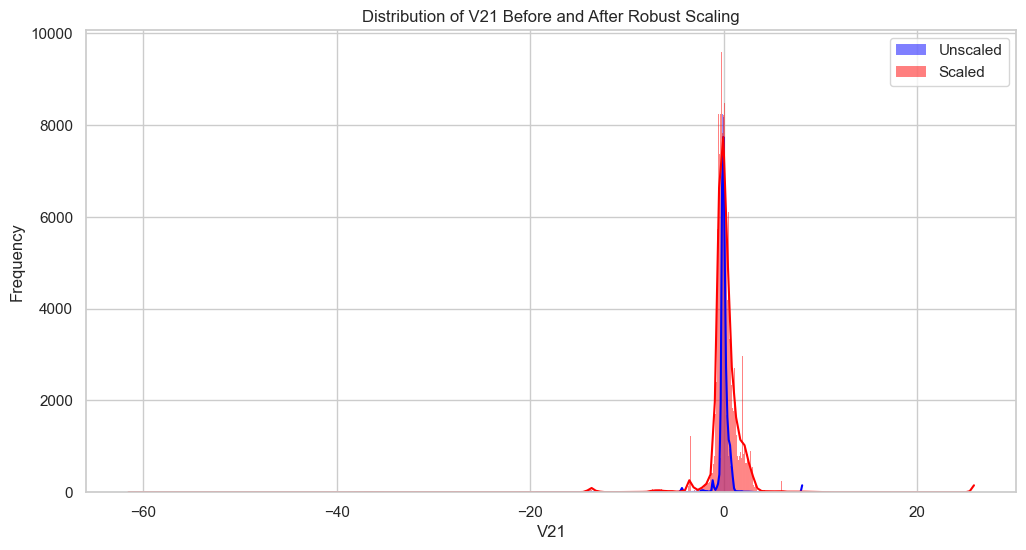

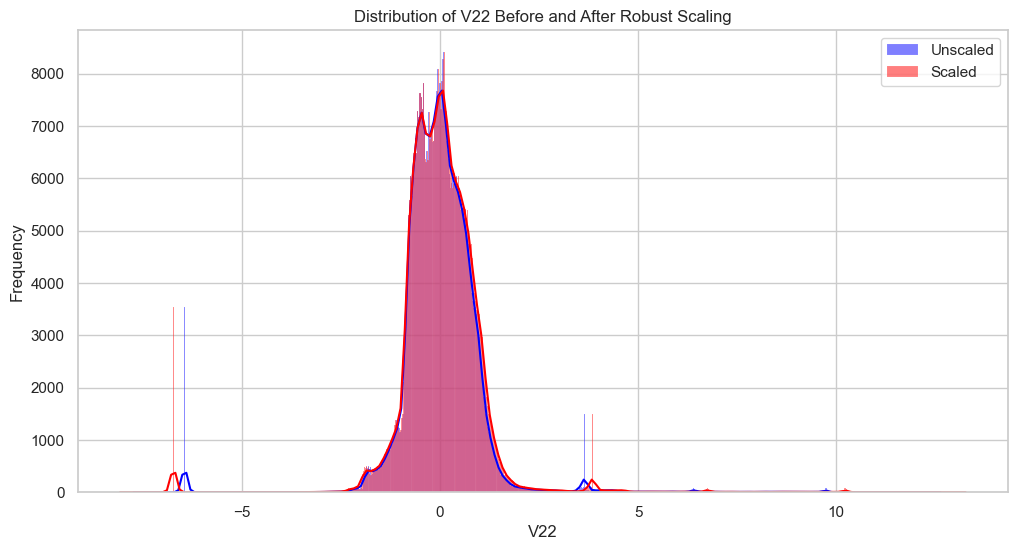

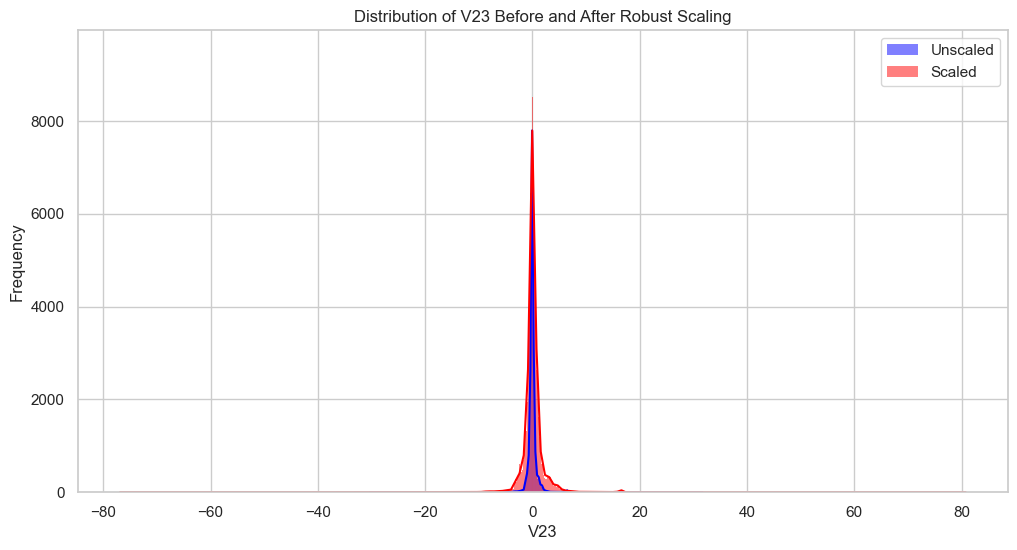

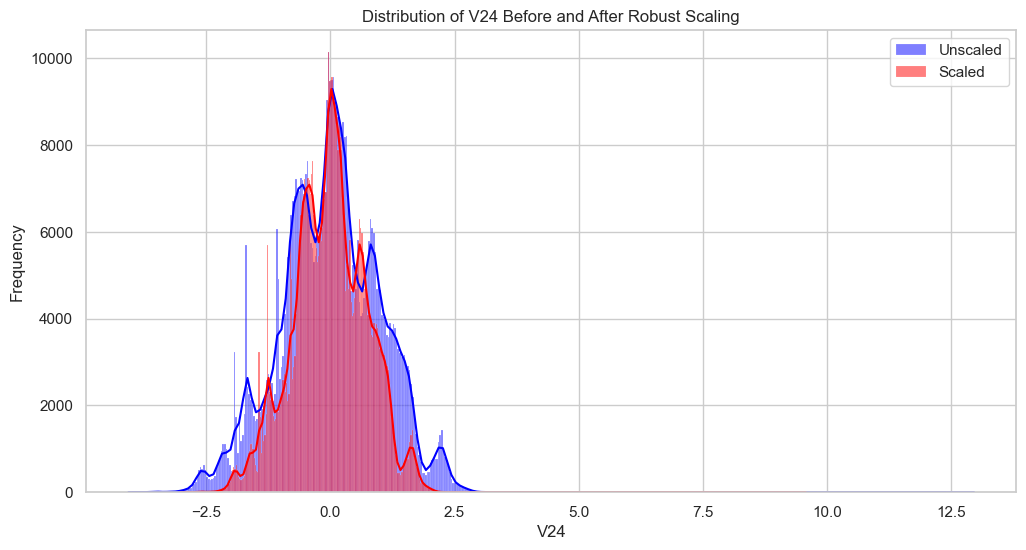

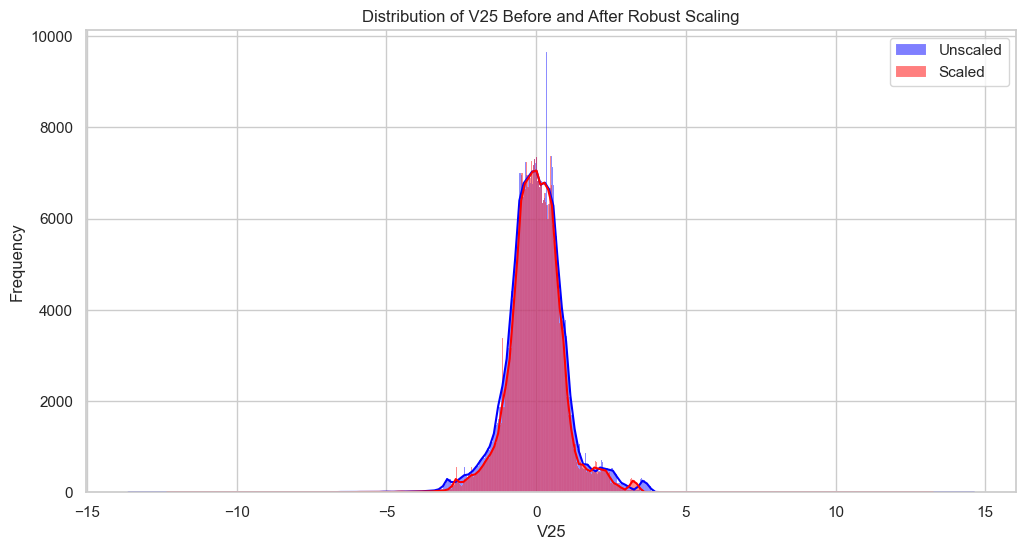

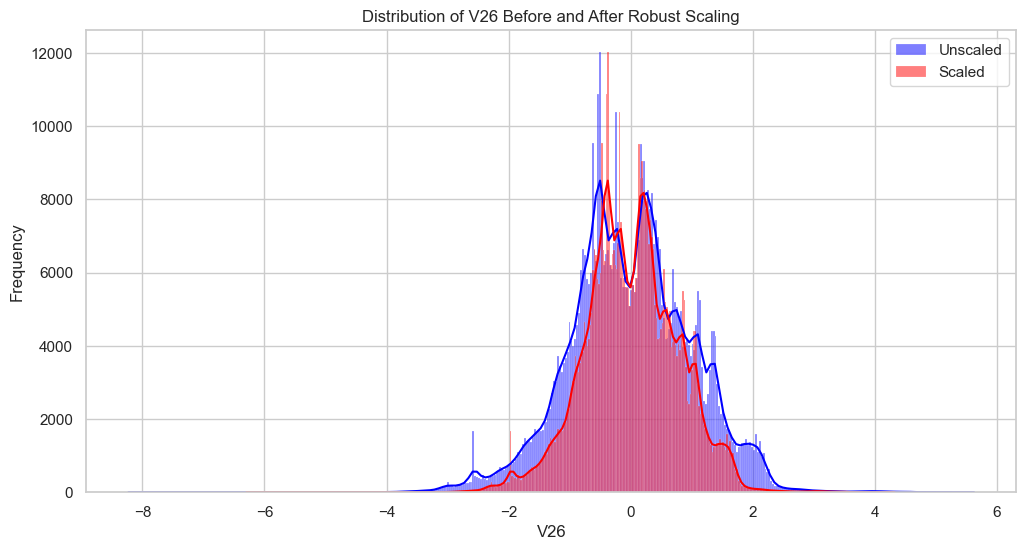

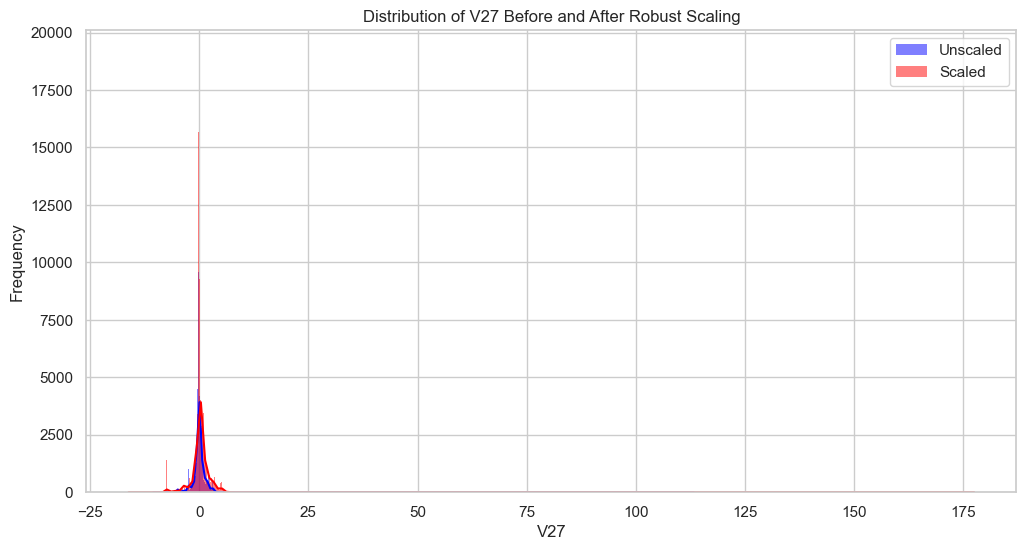

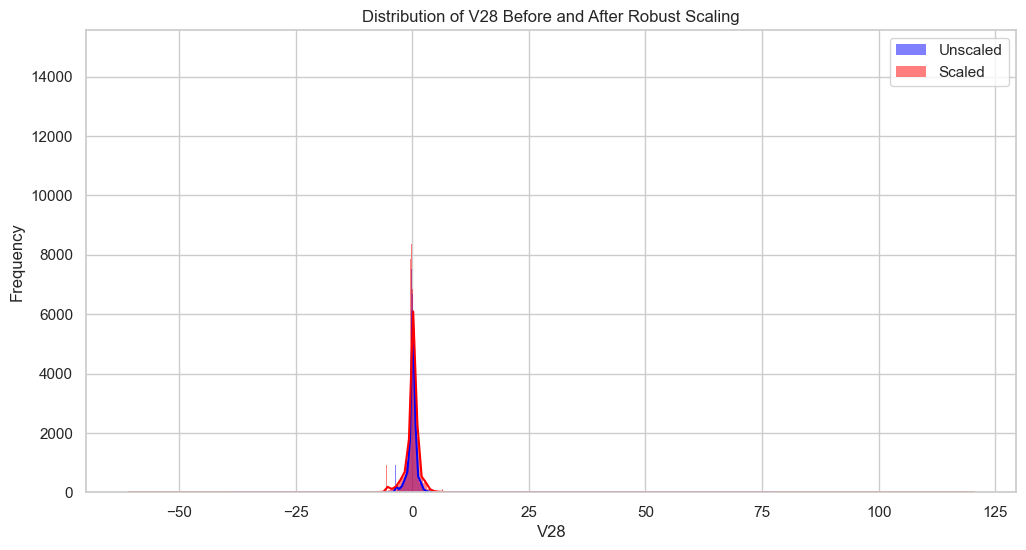

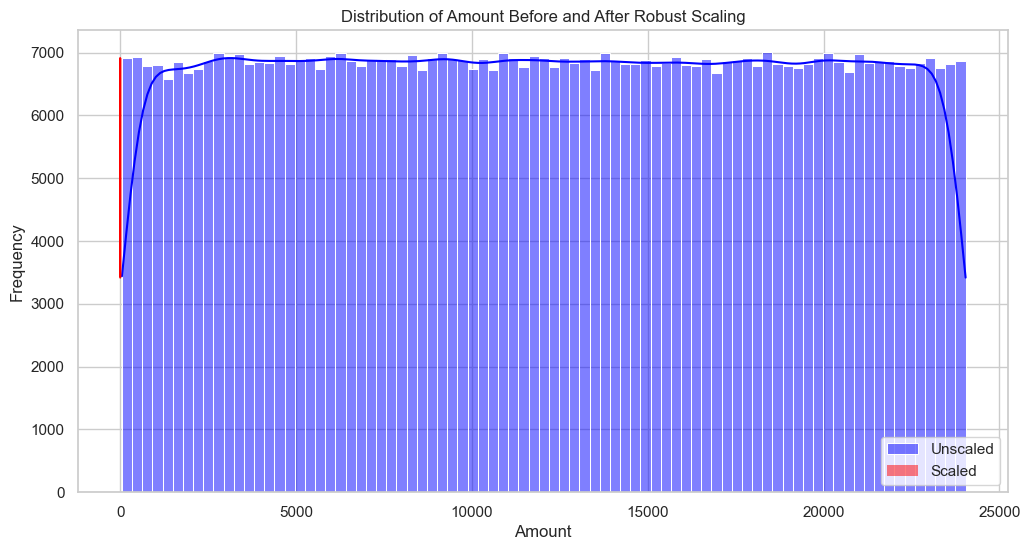

In [16]:
# Plot distribution of all the columns
sns.set(style="whitegrid")

# Loop through each column in the DataFrame
for column in cols:
    if column != 'Class':  # Exclude the target column
        plt.figure(figsize=(12,6))
        # Plot the distribution for legitimate transactions
        sns.histplot(x = column, data = df, kde=True, color='blue', label='Unscaled')
        
        # Plot the distribution for fraudulent transactions
        sns.histplot(x = column, data = X, kde=True, color='red', label='Scaled')

        plt.title(f'Distribution of {column} Before and After Robust Scaling')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()
        

## Predictive Modeling

### Logistic Regression

In [17]:
log = LogisticRegression() # Initialize Logistic Regression Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Partition the data
log.fit(X_train, y_train)

LogisticRegression()

AUC-ROC: 0.9934


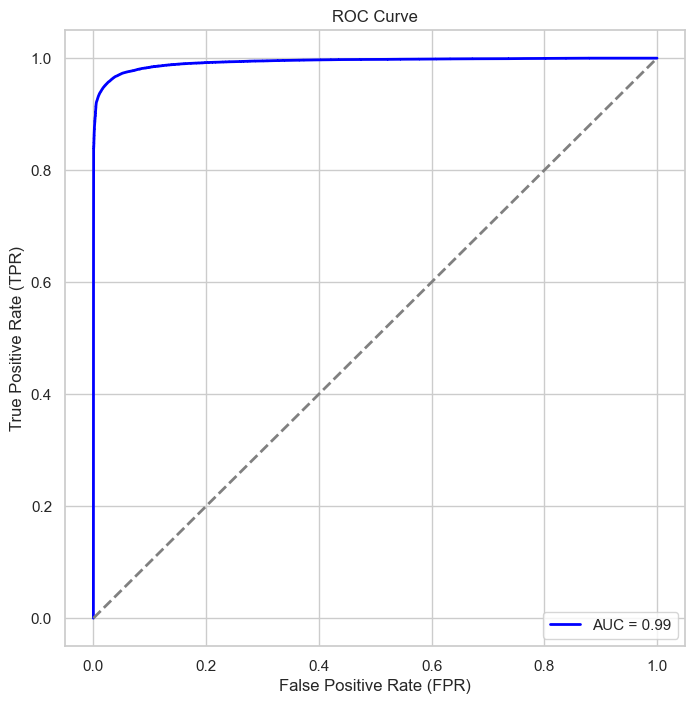

In [18]:
# Predict probabilities on the test set
y_prob = log.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_prob)
print(f'AUC-ROC: {auc_roc:.4f}')
# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

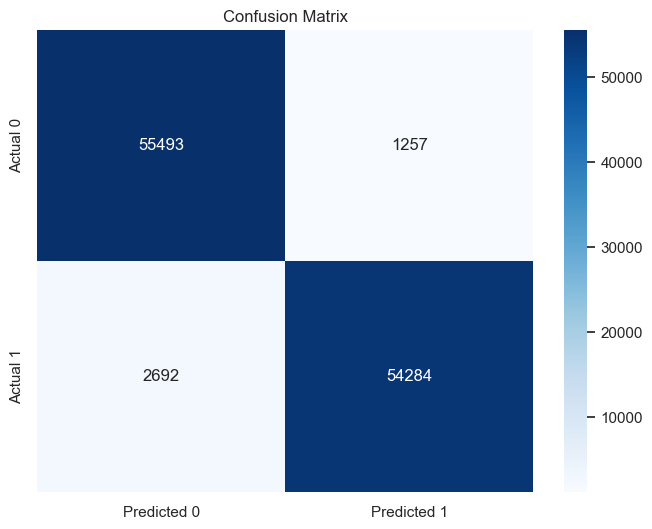

In [19]:
# Generate a confusion matrix
y_pred = log.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### Decision Tree

In [20]:
tree = DecisionTreeClassifier() # Initialize Decision Tree Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) # Partition the data
tree.fit(X_train, y_train)

DecisionTreeClassifier()

AUC-ROC: 0.9980


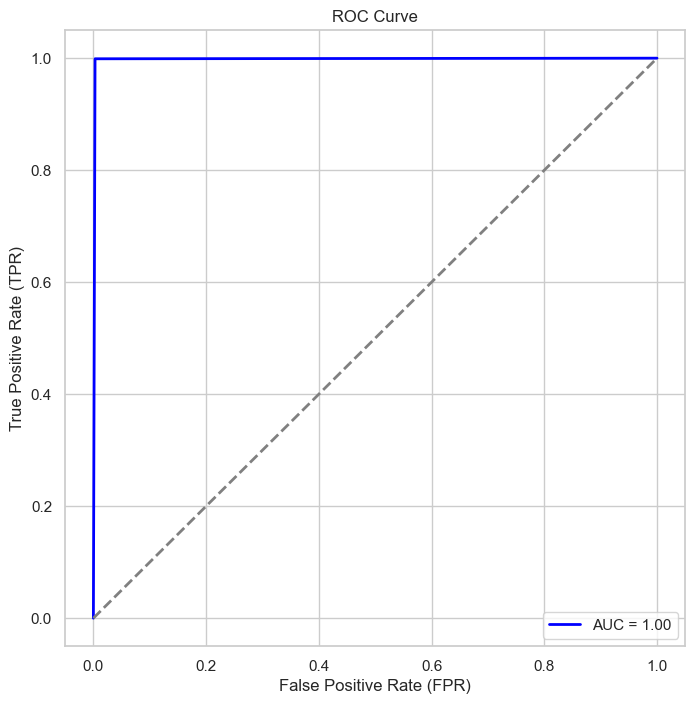

In [21]:
# Predict probabilities on the test set
y_prob = tree.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_prob)
print(f'AUC-ROC: {auc_roc:.4f}')
# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

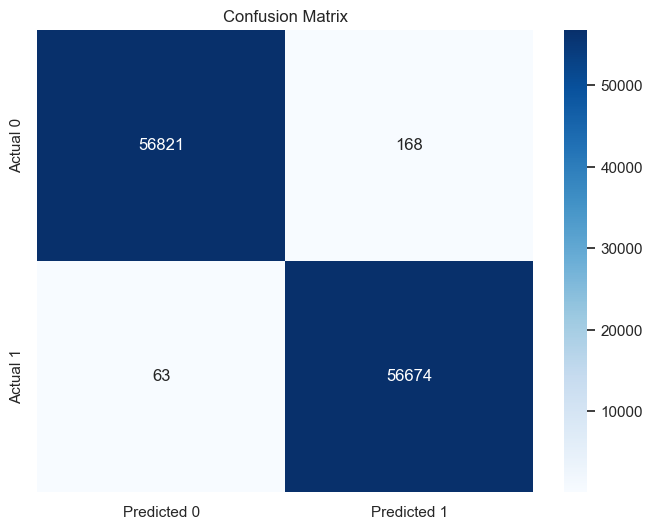

In [22]:
# Generate a confusion matrix
y_pred = tree.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

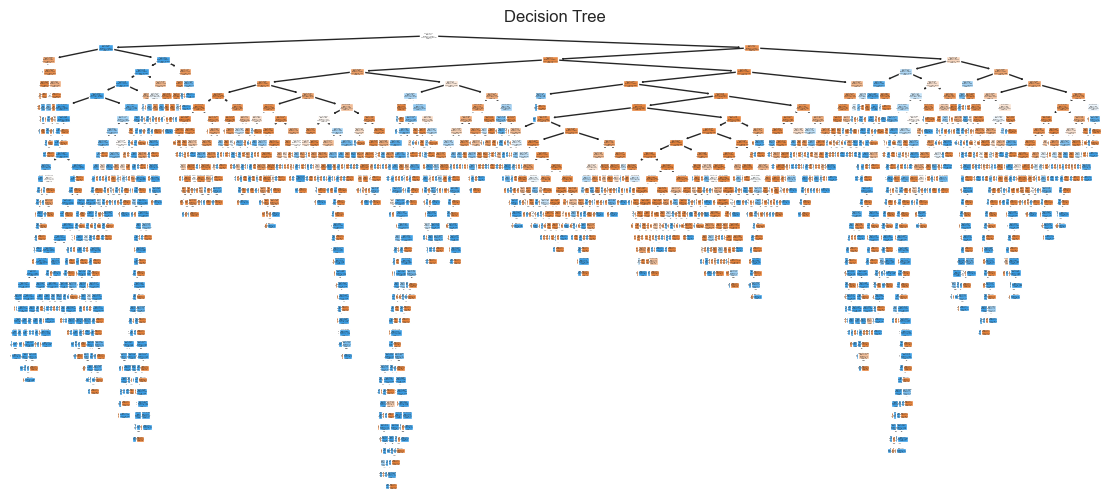

In [23]:
# Plot Decision Tree
fig = plt.figure(figsize=(14,6))
ax = plot_tree(tree, feature_names=X.columns.to_list(), class_names='Class', filled=True)
plt.title('Decision Tree')
plt.show()

### Random Forest Classification

In [24]:
forest = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32) # Partition the data
forest.fit(X_train, y_train)

RandomForestClassifier()

AUC-ROC: 1.0000


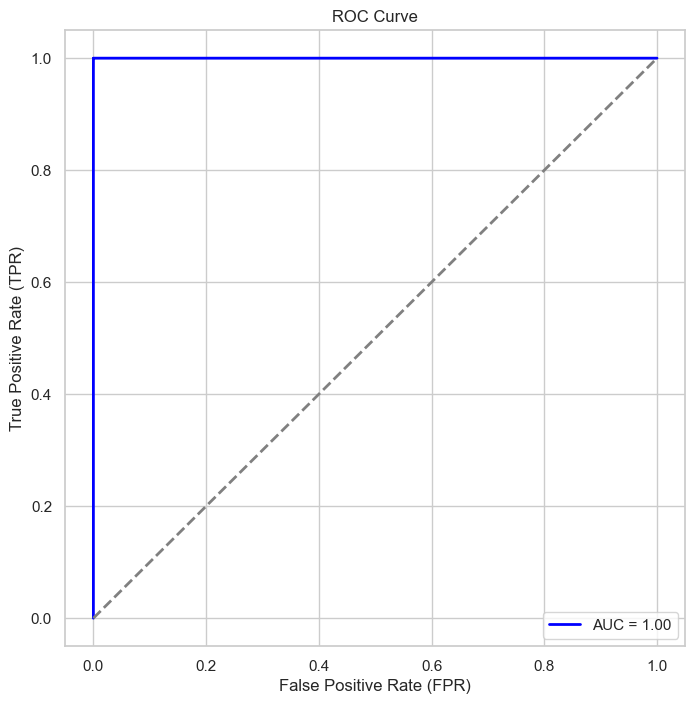

In [25]:
# Predict probabilities on the test set
y_prob = forest.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_prob)
print(f'AUC-ROC: {auc_roc:.4f}')
# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

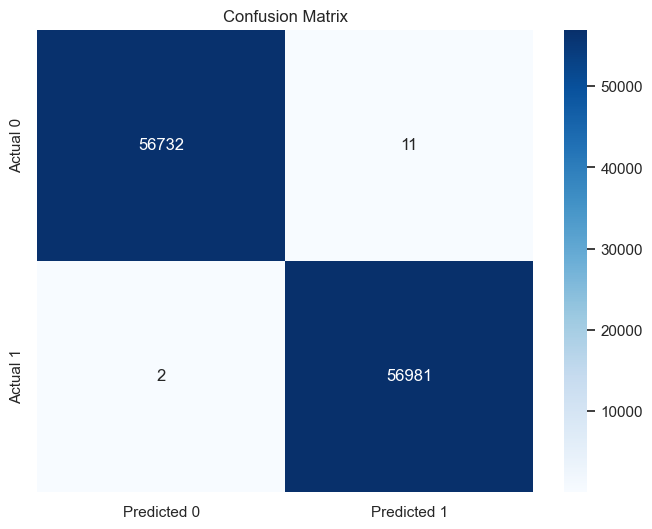

In [26]:
# Generate a confusion matrix
y_pred = forest.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

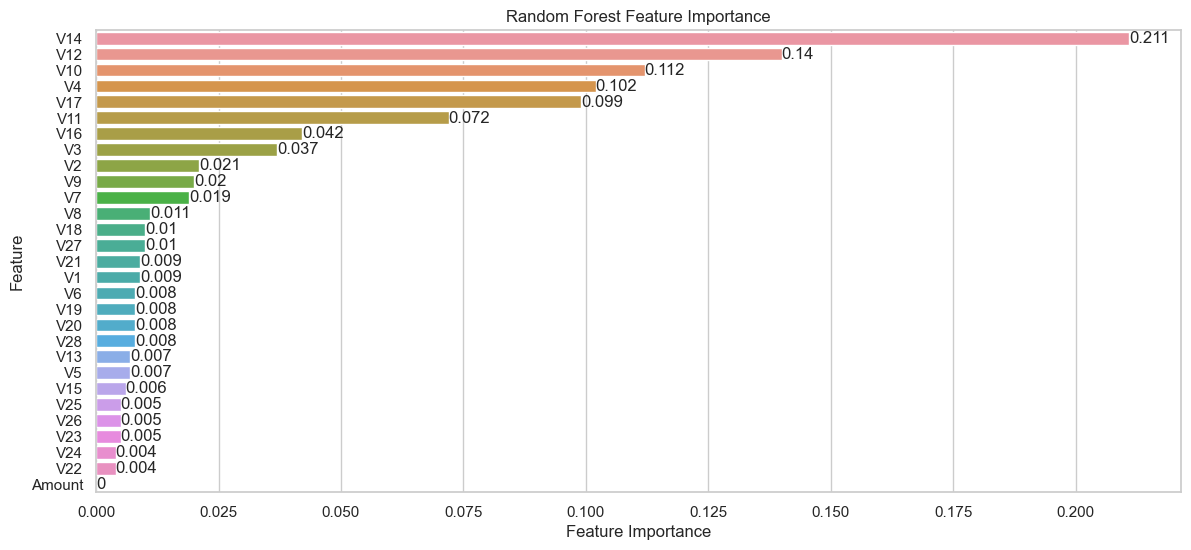

In [27]:
importances = forest.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': np.round(importances, 3)})
feature_importances = feature_importances.sort_values('importance', ascending=False)

fig = plt.figure(figsize=(14,6))
ax = sns.barplot(x='importance', y='feature', data=feature_importances)
ax.bar_label(ax.containers[0])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

### XGBoost

In [28]:
xgb = XGBClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # Partition the data
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

AUC-ROC: 1.0000


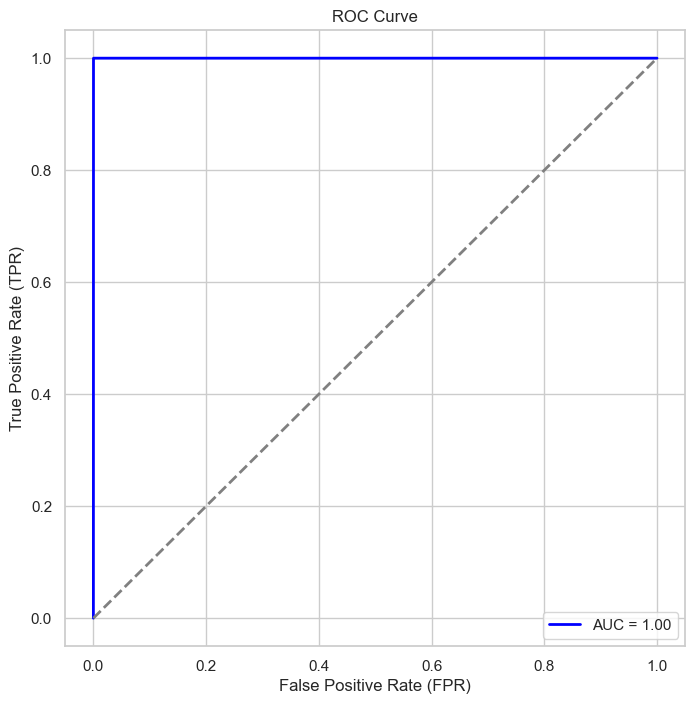

In [29]:
# Predict probabilities on the test set
y_prob = xgb.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_prob)
print(f'AUC-ROC: {auc_roc:.4f}')
# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

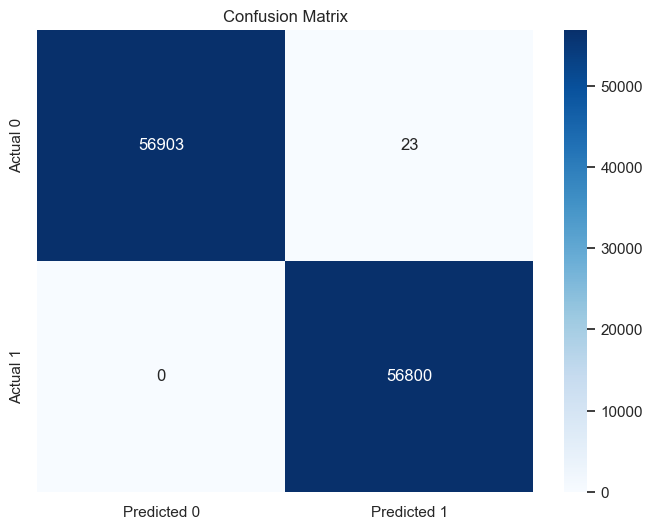

In [30]:
# Generate a confusion matrix
y_pred = xgb.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

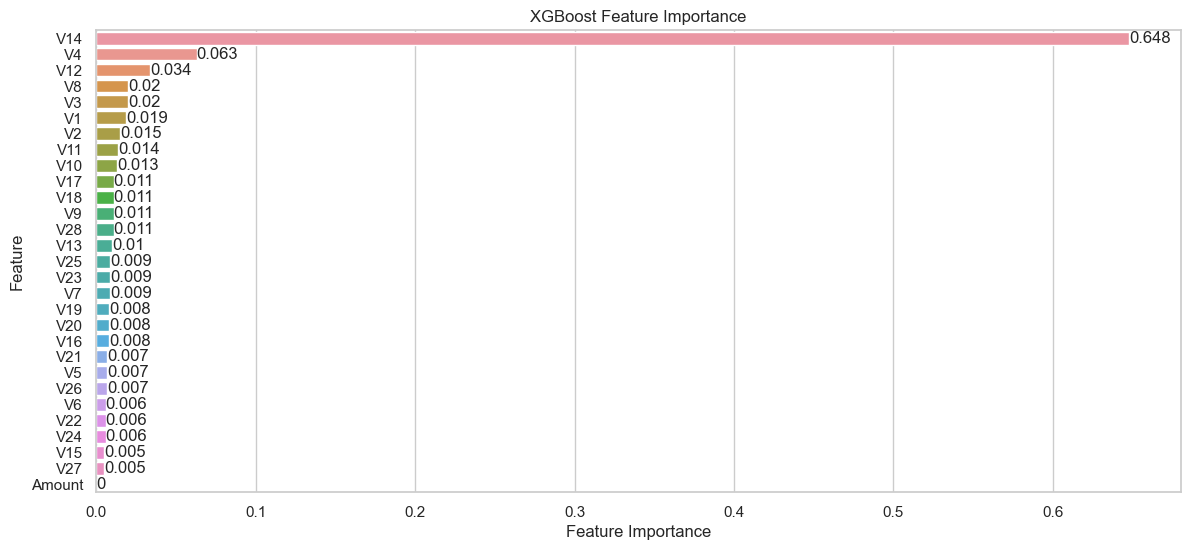

In [31]:
importances = xgb.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': np.round(importances, 3)})
feature_importances = feature_importances.sort_values('importance', ascending=False)

fig = plt.figure(figsize=(14,6))
ax = sns.barplot(x='importance', y='feature', data=feature_importances)
ax.bar_label(ax.containers[0])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.show()

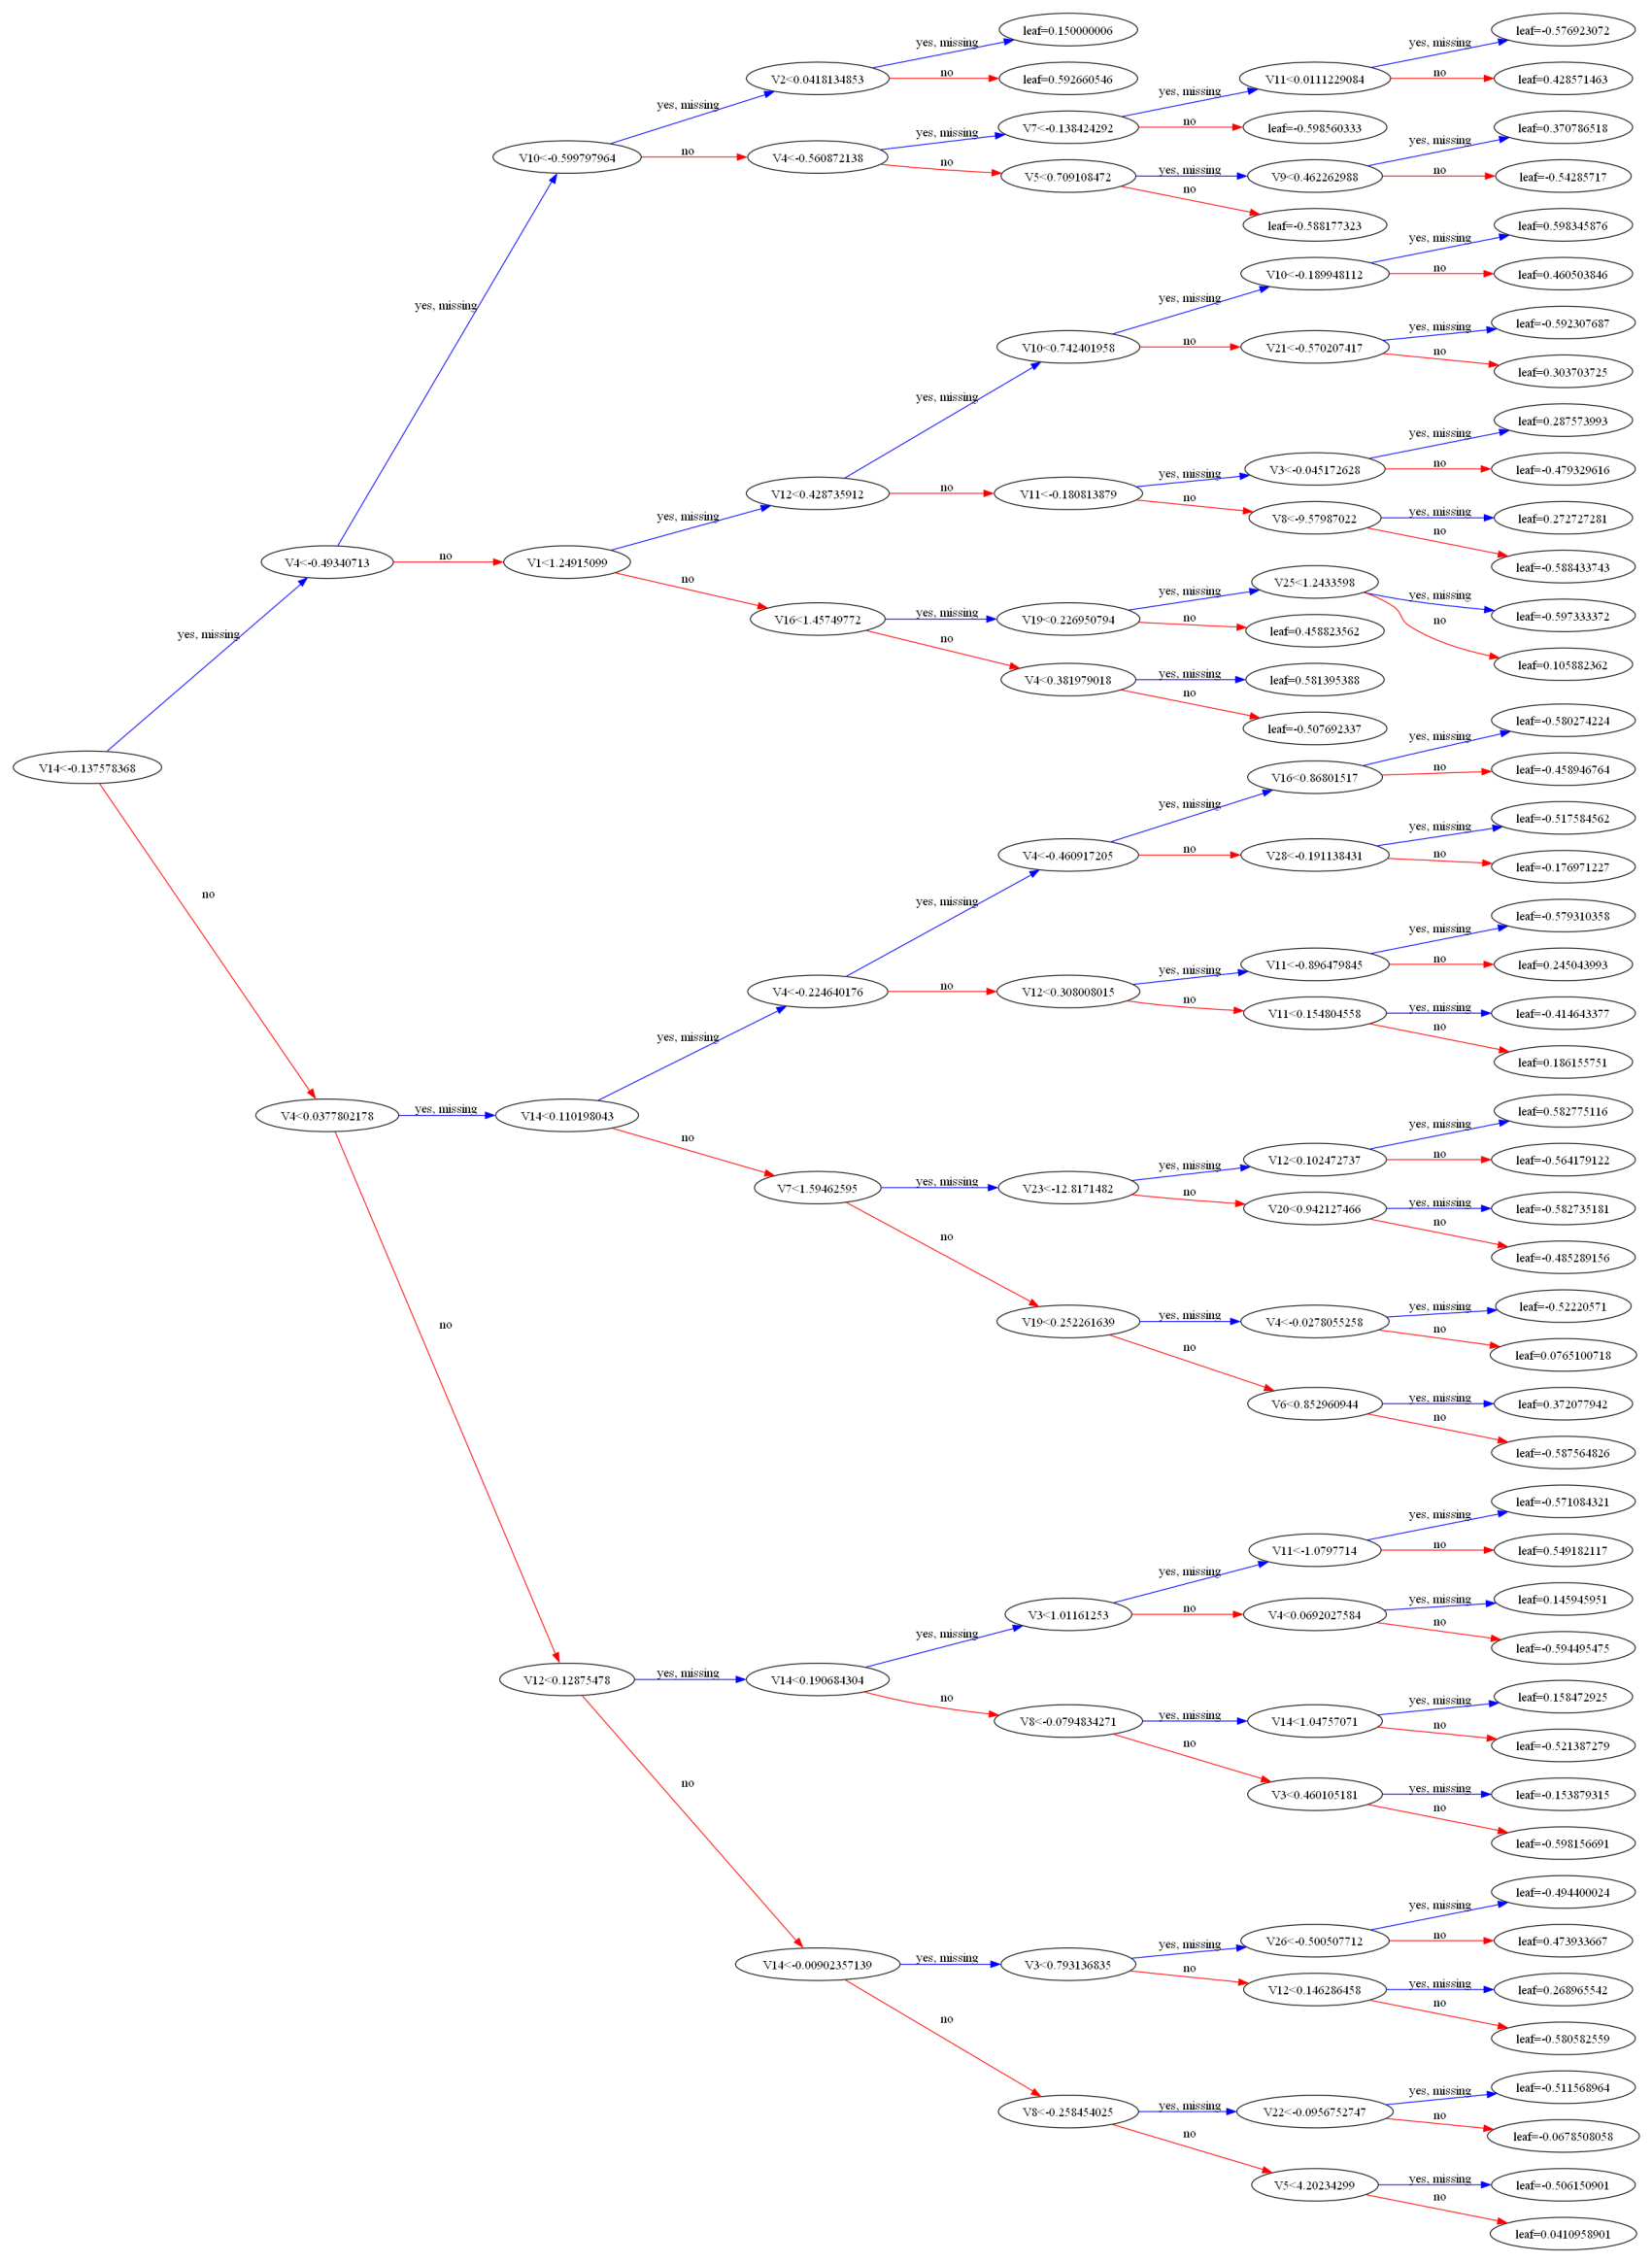

In [32]:
fig, ax = plt.subplots(figsize=(30, 30))
xgb_plot_tree(xgb, num_trees=0, rankdir='LR', ax=ax)
plt.show()

### Comparing all the Models

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier()
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    start_time = time.time()

    model.fit(X_train, y_train)
    
    # Predict probabilities on the test set
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Evaluate performance
    results[name] = {
        'Accuracy': accuracy_score(y_test, model.predict(X_test)),
        'Precision': precision_score(y_test, model.predict(X_test)),
        'Recall': recall_score(y_test, model.predict(X_test)),
        'F1 Score': f1_score(y_test, model.predict(X_test)),
        'AUC-ROC': roc_auc_score(y_test, y_prob),
        "Training Time (sec)" : time.time() - start_time
    }

# Display the results
results_df = pd.DataFrame(results).T

In [34]:
results_df

Accuracy  Precision    Recall  F1 Score   AUC-ROC   
Logistic Regression  0.965276   0.977368  0.952752  0.964903  0.993400  \
Random Forest        0.999894   0.999789  1.000000  0.999895  0.999989   
Decision Tree        0.998259   0.997477  0.999052  0.998264  0.998257   
XGBoost              0.999789   0.999579  1.000000  0.999789  0.999992   

                     Training Time (sec)  
Logistic Regression             2.532305  
Random Forest                 333.221199  
Decision Tree                  35.646480  
XGBoost                        44.467468

## Initial Comparision between Models
Upon utilizing all the features in the data to make predictions we see some useful comparisons
1. All the metrics perform well on the dataset, with Random Forest having the highest accuracy, Precision, Recall and F1-Score
2. However, Random Forest also takes the longest amount of time, more than seven times longer than the next longest trained model
3. With how little the metrics improve between XGBoost and Random Forest, XGBoost seems to be the most preferable model since it shows nearly identical results as Random Forest while taking more than 4.5 minutes less time 

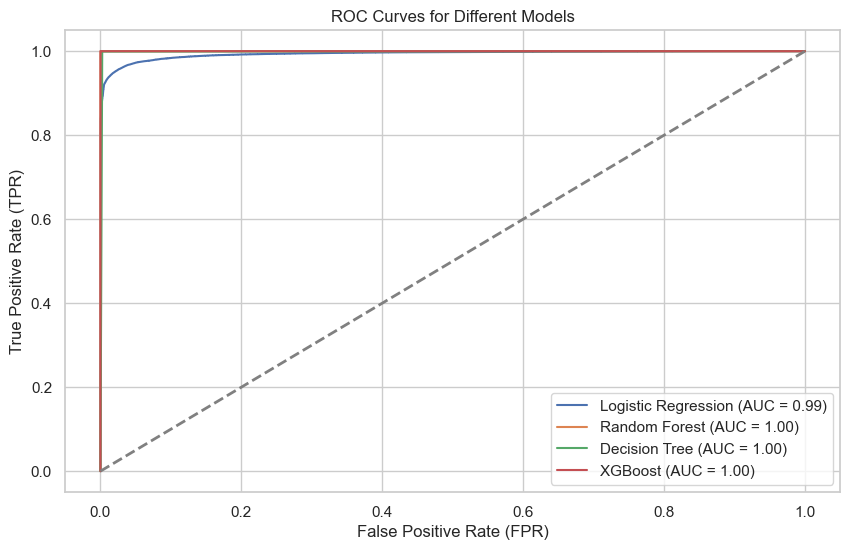

In [35]:
# Plot ROC curves
plt.figure(figsize=(10, 6))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {results[name]["AUC-ROC"]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.title('ROC Curves for Different Models')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

### Predictive Modeling with Reduced Features

Now I will do the same set of predictive models as before, however I will only use the top 5 features described by the initial Random Forest as being the most significant (V4, V10, V12, V14, V17)

In [36]:
# Reducing the data to the top 5 features as seen from the Random Forest
X_reduced = df[["V4", "V10", "V12", "V14", "V17"]]

# Split the data into training and testing sets
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Initialize models
models_reduced = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier()
}

# Train and evaluate each model
results_reduced = {}

for name, model in models_reduced.items():
    start_time = time.time()

    model.fit(X_train_reduced, y_train)
    
    # Predict probabilities on the test set
    y_prob = model.predict_proba(X_test_reduced)[:, 1]
    
    # Evaluate performance
    results_reduced[name] = {
        'Accuracy': accuracy_score(y_test, model.predict(X_test_reduced)),
        'Precision': precision_score(y_test, model.predict(X_test_reduced)),
        'Recall': recall_score(y_test, model.predict(X_test_reduced)),
        'F1 Score': f1_score(y_test, model.predict(X_test_reduced)),
        'AUC-ROC': roc_auc_score(y_test, y_prob),
        "Training Time (sec)" : time.time() - start_time
    }

# Display the results
reduced_results_df = pd.DataFrame(results_reduced).T

#### PCA

Lastly, I will use the same predictive models on data that has been reduced via PCA and preserving 95% of the variance.

In [37]:
pca = PCA(n_components=0.95) # n_components retain 95% of variance
X_pca = pca.fit_transform(X)

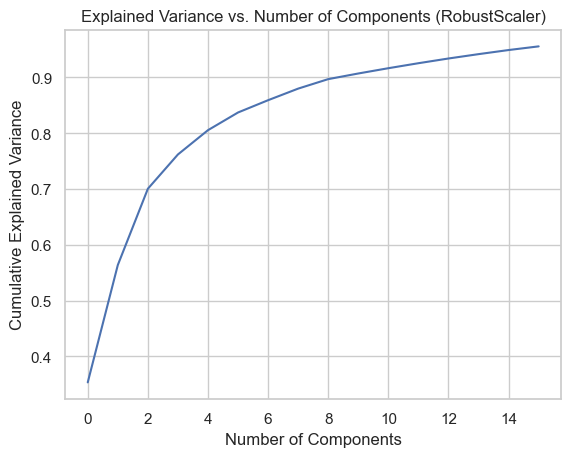

In [39]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot explained variance
plt.plot(cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components (RobustScaler)')
plt.show()

In [40]:
# Determine the number of components to keep
n_components_to_keep = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Number of components to keep (RobustScaler): {n_components_to_keep}")

Number of components to keep (RobustScaler): 16


In [41]:
# Apply PCA with the selected number of components
pca_final = PCA(n_components=n_components_to_keep)
X_final_pca = pca_final.fit_transform(X)

In [42]:
# Split the data into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_final_pca, y, test_size=0.2, random_state=42)

# Initialize models
models_pca = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier()
}

# Train and evaluate each model
results_pca = {}

for name, model in models_pca.items():
    start_time = time.time()

    model.fit(X_train_pca, y_train)
    
    # Predict probabilities on the test set
    y_prob = model.predict_proba(X_test_pca)[:, 1]
    
    # Evaluate performance
    results_pca[name] = {
        'Accuracy': accuracy_score(y_test, model.predict(X_test_pca)),
        'Precision': precision_score(y_test, model.predict(X_test_pca)),
        'Recall': recall_score(y_test, model.predict(X_test_pca)),
        'F1 Score': f1_score(y_test, model.predict(X_test_pca)),
        'AUC-ROC': roc_auc_score(y_test, y_prob),
        "Training Time (sec)" : time.time() - start_time
    }

# Display the results
results_pca_df = pd.DataFrame(results_pca).T

## Model Evaluations

In [43]:
results_df # Results after using classification models with all features

Accuracy  Precision    Recall  F1 Score   AUC-ROC   
Logistic Regression  0.965276   0.977368  0.952752  0.964903  0.993400  \
Random Forest        0.999894   0.999789  1.000000  0.999895  0.999989   
Decision Tree        0.998259   0.997477  0.999052  0.998264  0.998257   
XGBoost              0.999789   0.999579  1.000000  0.999789  0.999992   

                     Training Time (sec)  
Logistic Regression             2.532305  
Random Forest                 333.221199  
Decision Tree                  35.646480  
XGBoost                        44.467468

In [44]:
reduced_results_df # Results after using classification models with only the top 5 important features as determined by the initial random forest

Accuracy  Precision    Recall  F1 Score   AUC-ROC   
Logistic Regression  0.953836   0.973855  0.932902  0.952938  0.988288  \
Random Forest        0.998066   0.997511  0.998631  0.998070  0.999944   
Decision Tree        0.993854   0.992164  0.995595  0.993876  0.993850   
XGBoost              0.986564   0.988494  0.984643  0.986565  0.999222   

                     Training Time (sec)  
Logistic Regression             0.476434  
Random Forest                 130.956911  
Decision Tree                   4.315928  
XGBoost                        18.380727

In [45]:
results_pca_df # Results after using classification models on PCA reduced data by 16 principal components to capture 95% of the variance 

Accuracy  Precision    Recall  F1 Score   AUC-ROC   
Logistic Regression  0.945079   0.966594  0.922248  0.943901  0.983716  \
Random Forest        0.999851   0.999719  0.999982  0.999851  0.999994   
Decision Tree        0.996289   0.994613  0.997999  0.996303  0.996286   
XGBoost              0.999182   0.998475  0.999895  0.999184  0.999954   

                     Training Time (sec)  
Logistic Regression             0.784715  
Random Forest                 266.348236  
Decision Tree                  17.893284  
XGBoost                        30.122413

### Comparing the Data and Model Performances
Comparing the model performances between data of different dimensions we gain more valuable insights
1. Utilizing only the top 5 features from the initial Random Forest has shown to drastically decrease the training time
    - Notably the training time of Random Forest has been cut by more than half compared to the initial Random Forest using all the features
2. Utilizing PCA resulted in using 16 features which decreased the training time, just not to the extent of using only 5 features
3. The difference in performance between all the models does not change much with the original having the best performance, followed by PCA, and then 5 features

### Conclusion
We have successfully reduced the training time of the models by utilizing dimensionality reduction. When using only the top 5 features, we were able to achieve performance that was nearly identical to the original models utilizing all the features, however the training time was cut by more than half especially for the Random Forest. Therefore, given how little the performance changes, the only features of importance are V4, V10, V12, V14, V17, and utilizing only those features gives similar results to using all the features but with far less training time.